In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import re
import time
import warnings
warnings.filterwarnings("ignore") 

from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,KFold,RepeatedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import wilcoxon
import scipy.stats as stats
import random


from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statistics

In [2]:
cancer_data=pd.read_csv('Breast_cancer_data.csv')
cancer_data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [3]:
cancer_data.shape

(569, 6)

In [4]:
cancer_data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [5]:
# Percentage of patients have and do not have breast cancer
cancer_data['diagnosis'].value_counts()/cancer_data.shape[0]*100 

1    62.741652
0    37.258348
Name: diagnosis, dtype: float64

## Analyzing Data

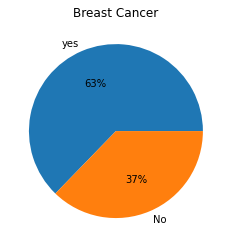

In [6]:
# plot to display the percentage of the people having and not having breast cancer 
labels = ['yes', 'No']
values = cancer_data['diagnosis'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Breast Cancer')
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

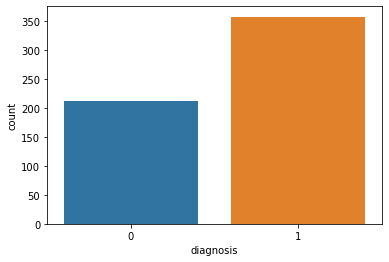

In [7]:
sns.countplot(x='diagnosis',data=cancer_data)

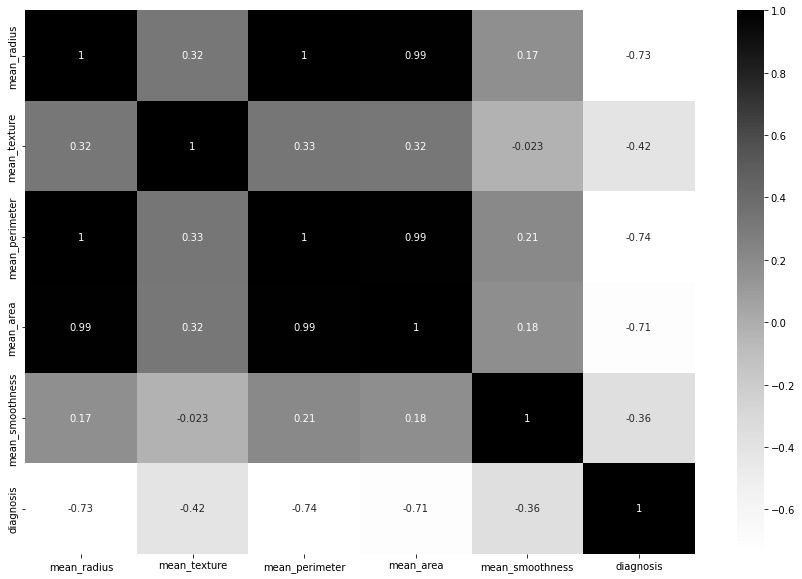

In [8]:
# Correlation map
plt.figure(figsize=(15, 10))
sns.heatmap(cancer_data.corr(), annot = True, cmap = "Greys")
plt.show()

## Data Wrangling

In [9]:
cancer_data.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [10]:
cancer_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

## Data preprocessing

In [11]:
X=cancer_data.drop('diagnosis',axis=1)
y=cancer_data["diagnosis"]
y_label = cancer_data['diagnosis'].values.reshape(X.shape[0], 1)
headers = X.columns

X = preprocessing.minmax_scale(X, feature_range=(0.001, 1))
X= pd.DataFrame(X)
X.columns = headers

## Training Data & Evaluating ML Models

## SVC

Accuracy: 92.65339274111206
Precision: 96.10550817557774
Recall: 92.53904657487057
f1_score: 94.25057094642521
AUC: 0.927277071946818
Standard deviation of accuracy:  0.01261769284203639
Standard deviation of precision:  0.020843034106768518
Standard deviation of recall:  0.021854397499612932
Standard deviation of f1_score:  0.009640152090937985
Standard deviation of AUC:  0.015217118088339523


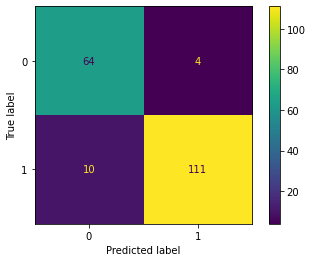

In [12]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy1 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sv = SVC()
    y_pred = fit_eval_model(sv, X_train, y_train, X_test, y_test)

    accuracy1.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy1)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy1))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## RandomForest Classifier

Accuracy: 91.89705745846096
Precision: 95.04548260240243
Recall: 92.32920723972929
f1_score: 93.63517317216625
AUC: 0.91741328479429
Standard deviation of accuracy:  0.02134788796291165
Standard deviation of precision:  0.021028622339651196
Standard deviation of recall:  0.026842360044565045
Standard deviation of f1_score:  0.016804971401489066
Standard deviation of AUC:  0.022231379196217916


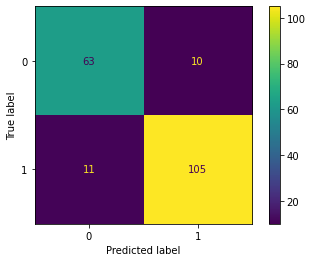

In [13]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy2 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier()
    y_pred = fit_eval_model(rf, X_train, y_train, X_test, y_test)

    accuracy2.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy2)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy2))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Ada Boost Classifier

Accuracy: 92.02042142393022
Precision: 94.69899530365066
Recall: 92.81479285165138
f1_score: 93.70385036551421
AUC: 0.9179122728876853
Standard deviation of accuracy:  0.019347351843405657
Standard deviation of precision:  0.023426970329561838
Standard deviation of recall:  0.027263457699112786
Standard deviation of f1_score:  0.0154055489083286
Standard deviation of AUC:  0.01951396713813374


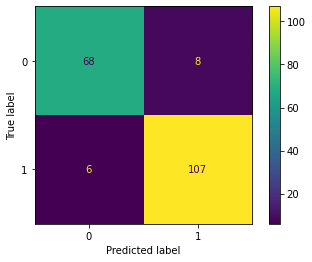

In [14]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy3 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ab = AdaBoostClassifier()
    y_pred = fit_eval_model(ab, X_train, y_train, X_test, y_test)

    accuracy3.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy3)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy3))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Gradient boosting Classifier

Accuracy: 91.68727373990532
Precision: 94.96855458622557
Recall: 92.0597677710044
f1_score: 93.46931585207602
AUC: 0.9152899287201653
Standard deviation of accuracy:  0.0212645980308377
Standard deviation of precision:  0.01666501035905065
Standard deviation of recall:  0.026222988515674804
Standard deviation of f1_score:  0.016716209833375524
Standard deviation of AUC:  0.02122529235477236


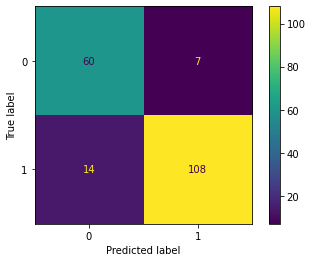

In [15]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy4 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gb = GradientBoostingClassifier(random_state = 1)
    y_pred = fit_eval_model(gb, X_train, y_train, X_test, y_test)

    accuracy4.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy4)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy4))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Logistic Regression

Accuracy: 91.36981342244502
Precision: 98.42739233929548
Recall: 89.01182811680411
f1_score: 93.4440656040715
AUC: 0.9288442589371093
Standard deviation of accuracy:  0.017540454757319728
Standard deviation of precision:  0.011899493924760004
Standard deviation of recall:  0.029924048491702725
Standard deviation of f1_score:  0.01419395231738933
Standard deviation of AUC:  0.012697303582130014


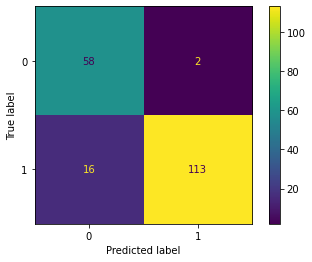

In [16]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy5 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lg = LogisticRegression(random_state = 1,solver='lbfgs', max_iter=1000)
    y_pred = fit_eval_model(lg, X_train, y_train, X_test, y_test)

    accuracy5.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy5)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy5))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

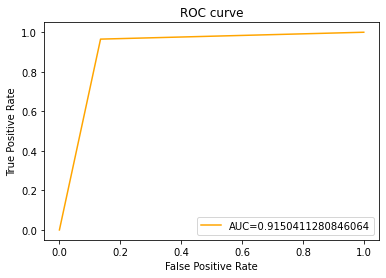

In [17]:
y_pred_proba = sv.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

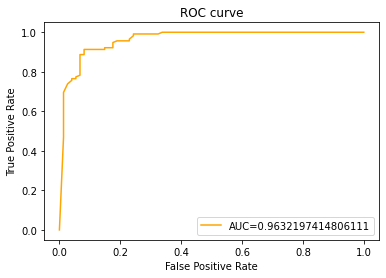

In [18]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

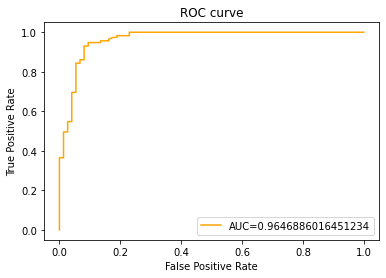

In [19]:
y_pred_proba = ab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

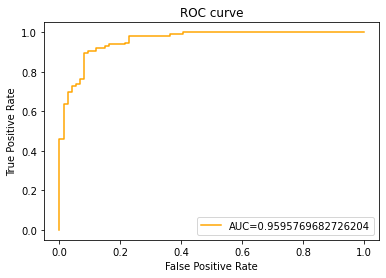

In [20]:
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

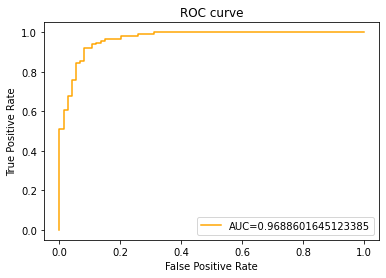

In [21]:
y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hypertuning ML Models

## Gradient Boosting Classifier

Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 1, 'max_depth': 1, 'max_features': 10, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.9316425120772948
Test accuracy: 92.10526315789474
Precision: 94.11764705882352
Recall: 92.7536231884058
F1 score: 93.43065693430658
AUC score: 0.9193236714975846
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 1, 'max_depth': 10, 'max_features': 1, 'n_estimators': 50}

Mean cross-validated training accuracy score: 0.9363285024154588
Test accuracy: 85.96491228070175
Precision: 85.52631578947368
Recall: 92.85714285714286
F1 score: 89.04109589041096
AUC score: 0.8392857142857143
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'friedman_ms

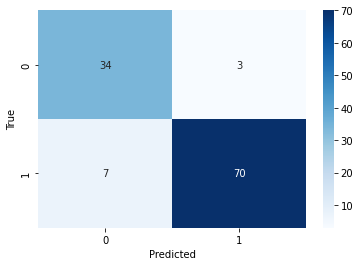

In [22]:
#-------------------------------------------------GridSearchCV-----------------------------------------------------#
best_params_list1=[]
ac_list1=[]
start = time.time()
    
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_1 = GridSearchCV(gb, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    gs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_1.best_params_)
    best_params_list1.append(gs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_1.best_score_)
    gs_1.best_estimator_.fit(X_train, y_train)
    y_pred = gs_1.best_estimator_.predict(X_test)    # Predictions
    y_true = y_test                                  # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list1.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 92.9122807017544
Precision: 95.08130498626556
Recall: 93.73766843378958
f1_score: 94.36658955693592
AUC: 0.9261325582250346
Standard deviation of accuracy:  0.023907136032335716
Standard deviation of precision:  0.025271039806535188
Standard deviation of recall:  0.029006551670254878
Standard deviation of f1_score:  0.019675096841302763
Standard deviation of AUC:  0.026091067049970395


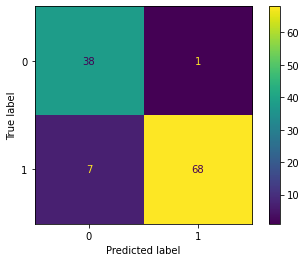

In [23]:
accuracy6=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list1[ac_list1.index(max(ac_list1))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb1 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb1.fit(X_train, y_train)
    y_pred = gb1.predict(X_test)
    
 
    accuracy6.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy6)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy6))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

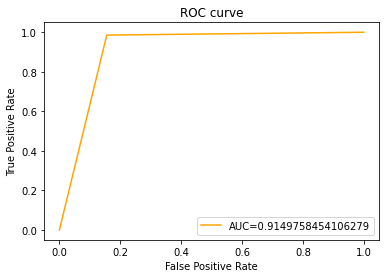

In [24]:
y_pred_proba = gb1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 1, 'max_depth': 10, 'learning_rate': 0.01, 'criterion': 'friedman_mse'}

Mean cross-validated training accuracy score: 0.927536231884058
Test accuracy: 91.22807017543859
Precision: 92.95774647887323
Recall: 92.95774647887323
F1 score: 92.95774647887323
AUC score: 0.9066491975106453
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 1, 'max_depth': 10, 'learning_rate': 1, 'criterion': 'friedman_mse'}

Mean cross-validated training accuracy score: 0.9230917874396136
Test accuracy: 89.47368421052632
Precision: 89.04109589041096
Recall: 94.20289855072464
F1 score: 91.54929577464787
AUC score: 0.8821256038647343
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'm

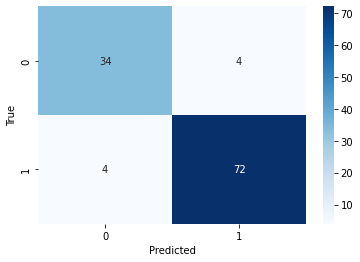

In [25]:
#-------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list2=[]
ac_list2=[]
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_1 = RandomizedSearchCV(gb, param_distributions=hyperparameter_space,n_iter=10, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_1.best_params_)
    best_params_list2.append(rs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_1.best_score_)
    rs_1.best_estimator_.fit(X_train, y_train)
    y_pred = rs_1.best_estimator_.predict(X_test) # Predictions
    y_true = y_test # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list2.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-----------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 92.2017543859649
Precision: 94.7387776982249
Recall: 93.00063761999745
f1_score: 93.82430198528024
AUC: 0.9191527336125265
Standard deviation of accuracy:  0.024587180468751246
Standard deviation of precision:  0.02490563714597835
Standard deviation of recall:  0.029281305841283883
Standard deviation of f1_score:  0.019769527719412438
Standard deviation of AUC:  0.026765334795187796


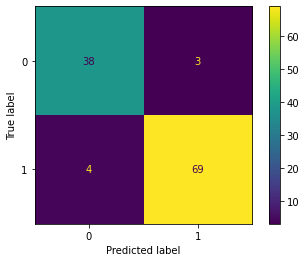

In [26]:
accuracy7=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list2[ac_list2.index(max(ac_list2))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    gb2 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb2.fit(X_train, y_train)
    y_pred = gb2.predict(X_test)
    accuracy7.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy7)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy7))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

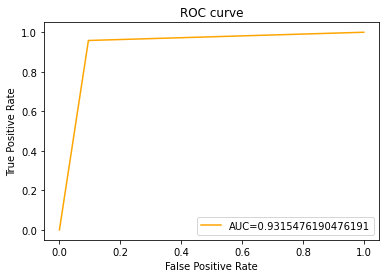

In [27]:
y_pred_proba = gb2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
#--------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]
row, col=X.shape

start = time.time()
params_gbm ={
    'max_depth':(1,10), 
    'max_features':(1,10),
    'learning_rate':(0.01, 1),
    'n_estimators':(50, 150)
}

# Gradient Boosting Machine
def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    
    model = gb
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f


training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
        
gbm_bo_1 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_1.maximize(init_points=10,n_iter=4)
        
        
print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_1.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)
        
end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9211    | 0.3808    | 9.556     | 7.588     | 109.9     |
| 2         | 0.9211    | 0.1645    | 2.404     | 1.523     | 136.6     |
| 3         | 0.9211    | 0.6051    | 7.373     | 1.185     | 147.0     |
| 4         | 0.9211    | 0.8341    | 2.911     | 2.636     | 68.34     |
| 5         | 0.9211    | 0.3112    | 5.723     | 4.888     | 79.12     |
| 6         | 0.9211    | 0.6157    | 2.255     | 3.629     | 86.64     |
| 7         | 0.9211    | 0.4615    | 8.067     | 2.797     | 101.4     |
| 8         | 0.9211    | 0.5965    | 1.418     | 6.468     | 67.05     |
| 9         | 0.9211    | 0.0744    | 9.54      | 9.691     | 130.8     |
| 10        | 0.9211    | 0.3116    | 1.879     | 7.158     | 94.02     |
| 11        | 0.9211    | 0.7259    | 7.013     | 3.006     | 56.39     |
| 12        | 0.9211    | 0.05873   | 

Accuracy: 88.95614035087719
Precision: 91.51470021933402
Recall: 90.91950499068963
f1_score: 91.15499173456497
AUC: 0.8835593711931117
Standard deviation of accuracy:  0.02671430196091095
Standard deviation of precision:  0.031643741701883464
Standard deviation of recall:  0.032436504204196914
Standard deviation of f1_score:  0.021766943599197647
Standard deviation of AUC:  0.02943042203637446


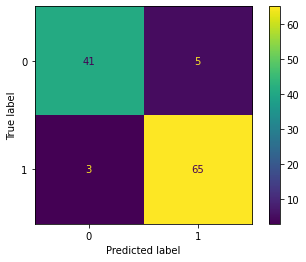

In [29]:
accuracy8=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb3 = GradientBoostingClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth, learning_rate=learning_rate)
    gb3.fit(X_train, y_train)
    y_pred = gb3.predict(X_test)
    
    accuracy8.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy8)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy8))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

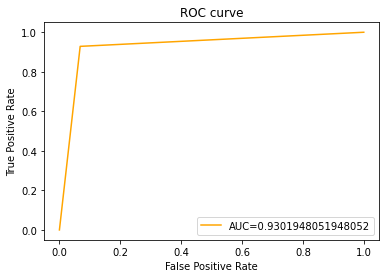

In [30]:
y_pred_proba = gb3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest Classifier

Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 50}

Mean cross-validated training accuracy score: 0.9272946859903382
Test accuracy: 94.73684210526315
Precision: 94.28571428571428
Recall: 97.05882352941177
F1 score: 95.65217391304348
AUC score: 0.9418158567774937
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'n_estimators': 50}

Mean cross-validated training accuracy score: 0.9143961352657005
Test accuracy: 95.6140350877193
Precision: 100.0
Recall: 93.24324324324324
F1 score: 96.5034965034965
AUC score: 0.9662162162162162
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 50}

Mean cross

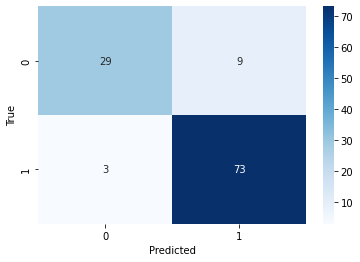

In [31]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list4=[]
ac_list4=[]   
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_2 = GridSearchCV(rf, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_2.best_params_)
    best_params_list4.append(gs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_2.best_score_)
    gs_2.best_estimator_.fit(X_train, y_train)
    y_pred = gs_2.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list4.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('----------------------------------------------------------------------------------------------------------------')
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 92.16666666666666
Precision: 95.61433828470908
Recall: 92.23108260743612
f1_score: 93.83424374012328
AUC: 0.9219711605735157
Standard deviation of accuracy:  0.025528874863882816
Standard deviation of precision:  0.023948957158387373
Standard deviation of recall:  0.03647823596828311
Standard deviation of f1_score:  0.021076989628936695
Standard deviation of AUC:  0.024939162460076235


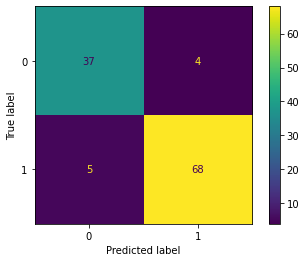

In [32]:
accuracy9=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list4[ac_list4.index(max(ac_list4))]
criterion=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rf1 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf1.fit(X_train, y_train)
    y_pred = rf1.predict(X_test)
    
    accuracy9.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy9)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy9))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

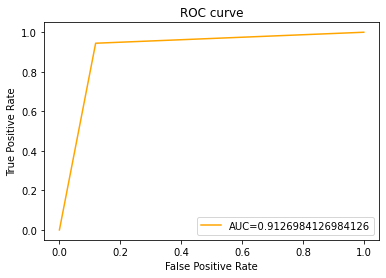

In [33]:
y_pred_proba = rf1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 50, 'max_features': 10, 'max_depth': 10, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 0.929855072463768
Test accuracy: 92.10526315789474
Precision: 94.44444444444444
Recall: 93.15068493150685
F1 score: 93.79310344827586
AUC score: 0.9169729368526561
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 50, 'max_features': 10, 'max_depth': 10, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 0.9207729468599034
Test accuracy: 92.98245614035088
Precision: 92.7536231884058
Recall: 95.52238805970148
F1 score: 94.11764705882352
AUC score: 0.9244204509368054
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 10, 'max_depth': 10, 'criterion': 'g

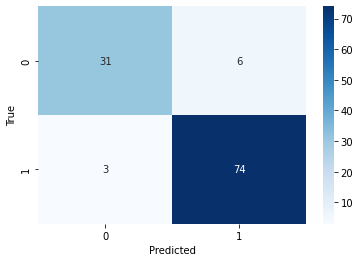

In [34]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list5=[]
ac_list5=[]
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_2 = RandomizedSearchCV(rf, param_distributions=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_2.best_params_)
    best_params_list5.append(rs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_2.best_score_)
    rs_2.best_estimator_.fit(X_train, y_train)
    y_pred = rs_2.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list5.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 92.2719298245614
Precision: 95.53161768615676
Recall: 92.29859618130402
f1_score: 93.83529461618178
AUC: 0.9228922773677972
Standard deviation of accuracy:  0.026556726794525233
Standard deviation of precision:  0.024474847133332617
Standard deviation of recall:  0.03694468381235496
Standard deviation of f1_score:  0.022797426426996618
Standard deviation of AUC:  0.02618041081799324


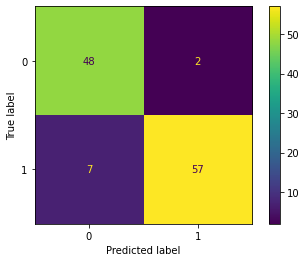

In [35]:
accuracy10=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list5[ac_list5.index(max(ac_list5))]
creation=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf2 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf2.fit(X_train, y_train)
    y_pred = rf2.predict(X_test)
    
    accuracy10.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy10)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy10))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

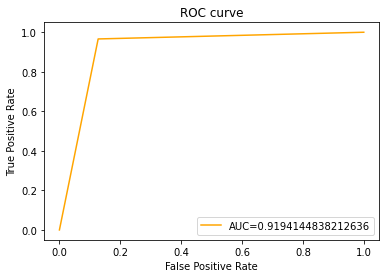

In [36]:
y_pred_proba = rf2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [37]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

params_gbm ={
    'max_depth':(1,10), 
    'max_features':(1,10),
    'n_estimators':(50, 150)
}

start = time.time()

def gbm_cl_bo(max_depth, max_features, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = rf
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f
   
training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
    
# Run Bayesian Optimization

gbm_bo_2 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_2.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_2.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
| 1         | 0.9386    | 4.371     | 9.556     | 123.2     |
| 2         | 0.9474    | 6.388     | 2.404     | 65.6      |
| 3         | 0.9386    | 1.523     | 8.796     | 110.1     |
| 4         | 0.9474    | 7.373     | 1.185     | 147.0     |
| 5         | 0.9386    | 8.492     | 2.911     | 68.18     |
| 6         | 0.9386    | 2.651     | 3.738     | 102.5     |
| 7         | 0.9386    | 4.888     | 3.621     | 111.2     |
| 8         | 0.9298    | 2.255     | 3.629     | 86.64     |
| 9         | 0.9386    | 5.105     | 8.067     | 69.97     |
| 10        | 0.9386    | 5.628     | 6.332     | 54.65     |
| 11        | 0.9386    | 8.041     | 1.207     | 146.9     |
| 12        | 0.9386    | 2.447     | 4.591     | 58.65     |
| 13        | 0.9298    | 3.927     | 5.312     | 64.28     |
| 14        | 0.9298    | 6.241     | 2.43      | 65.54     |
Accuracy

Accuracy: 91.87719298245612
Precision: 95.56982031914346
Recall: 91.91131432809433
f1_score: 93.64792636991332
AUC: 0.9194146437591114
Standard deviation of accuracy:  0.023010582964777204
Standard deviation of precision:  0.025010738943800494
Standard deviation of recall:  0.03294226219349826
Standard deviation of f1_score:  0.01859497864911924
Standard deviation of AUC:  0.023891455225484488


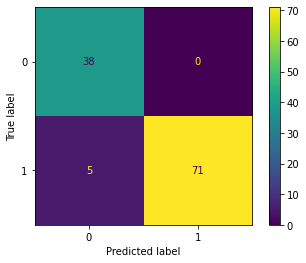

In [38]:
accuracy11=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
n_estimators=par['n_estimators']
max_features=par['max_features']
max_depth=par['max_depth']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf3 = RandomForestClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth )
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)

    accuracy11.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy11)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy11))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

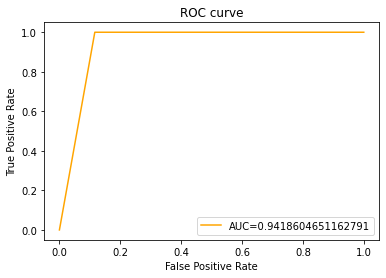

In [39]:
y_pred_proba = rf3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SVC

Optimal hyperparameter combination: {'C': 3, 'degree': 5}

Mean cross-validated training accuracy score: 0.92743961352657
Test accuracy: 90.35087719298247
Precision: 88.1578947368421
Recall: 97.10144927536231
F1 score: 92.41379310344827
AUC score: 0.8855072463768117
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'degree': 5}

Mean cross-validated training accuracy score: 0.9273913043478261
Test accuracy: 92.98245614035088
Precision: 92.5925925925926
Recall: 97.40259740259741
F1 score: 94.9367088607595
AUC score: 0.9059319059319059
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 3, 'degree': 5}

Mean cross-validated training accuracy score: 0.9231884057971016
Test accuracy: 97.36842105263158
Precision: 97.33333333333334
Recall: 98.64864864864865
F1 score: 97.986577181

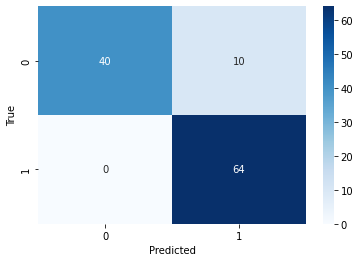

In [40]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list7=[]
ac_list7=[]
    
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_3 = GridSearchCV(sv, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_3.best_params_)
    best_params_list7.append(gs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_3.best_score_)
    gs_3.best_estimator_.fit(X_train, y_train)
    y_pred = gs_3.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list7.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 93.10526315789473
Precision: 96.52728319983669
Recall: 92.80055362960837
f1_score: 94.60162453620713
AUC: 0.9325386756668351
Standard deviation of accuracy:  0.02108583240635375
Standard deviation of precision:  0.02035564465549209
Standard deviation of recall:  0.02562277564892305
Standard deviation of f1_score:  0.017336966163431968
Standard deviation of AUC:  0.022496716516107924


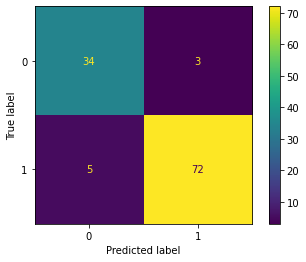

In [41]:
accuracy12=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list7[ac_list7.index(max(ac_list7))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv1 = SVC(C=C, degree=degree )
    sv1.fit(X_train, y_train)
    y_pred = sv1.predict(X_test)
    
    accuracy12.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy12)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy12))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

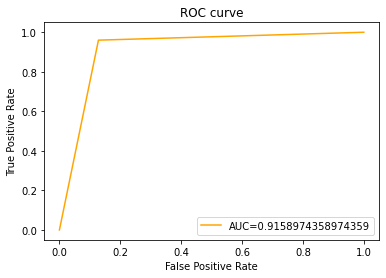

In [42]:
y_pred_proba = sv1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.9231400966183575
Test accuracy: 91.22807017543859
Precision: 90.9090909090909
Recall: 95.8904109589041
F1 score: 93.33333333333333
AUC score: 0.8940862011359839
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 10}

Mean cross-validated training accuracy score: 0.9318357487922706
Test accuracy: 92.98245614035088
Precision: 92.64705882352942
Recall: 95.45454545454545
F1 score: 94.02985074626866
AUC score: 0.9251893939393939
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.9298067632850241
Test accuracy: 95.6140350877193
Precision: 95.83333333333334
Recall: 97.1830985915493
F1 score: 96.5034

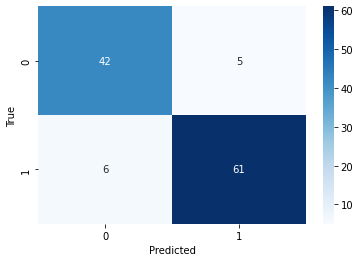

In [43]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list8=[]
ac_list8=[]
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_3 = RandomizedSearchCV(sv, param_distributions=hyperparameter_space,scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_3.best_params_)
    best_params_list8.append(rs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_3.best_score_)
    rs_3.best_estimator_.fit(X_train, y_train)
    y_pred = rs_3.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list8.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 92.67543859649123
Precision: 96.02390923596168
Recall: 92.60480698366189
f1_score: 94.25010698994816
AUC: 0.9271265389154247
Standard deviation of accuracy:  0.02231628292759319
Standard deviation of precision:  0.02222303746213141
Standard deviation of recall:  0.027413221473616668
Standard deviation of f1_score:  0.01795232488243844
Standard deviation of AUC:  0.02398121340508749


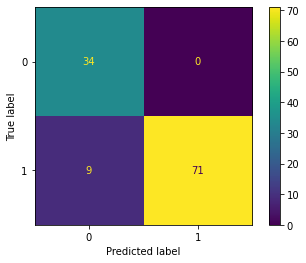

In [44]:
accuracy13=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list8[ac_list8.index(max(ac_list8))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv2 = SVC(C=C, degree=degree )
    sv2.fit(X_train, y_train)
    y_pred = sv2.predict(X_test)

    accuracy13.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy13)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy13))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

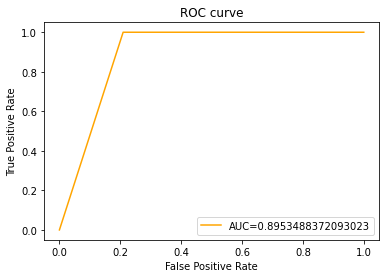

In [45]:
y_pred_proba = sv2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [46]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]


params_gbm ={
    'C':(3,10), 
    'degree':(5,20)
}

start = time.time()

def gbm_cl_bo(C, degree):
    params_gbm = {}
    params_gbm['C'] = round(C)
    params_gbm['degree'] = degree
   
    model = sv
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_3 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_3.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_3.max['params']
params_gbm['C'] = round(params_gbm['C'])
params_gbm['degree'] = round(params_gbm['degree'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     |  degree   |
-------------------------------------------------
| 1         | 0.9211    | 5.622     | 19.26     |
| 2         | 0.9211    | 8.124     | 13.98     |
| 3         | 0.9211    | 4.092     | 7.34      |
| 4         | 0.9211    | 3.407     | 17.99     |
| 5         | 0.9211    | 7.208     | 15.62     |
| 6         | 0.9211    | 3.144     | 19.55     |
| 7         | 0.9211    | 8.827     | 8.185     |
| 8         | 0.9211    | 4.273     | 7.751     |
| 9         | 0.9211    | 5.13      | 12.87     |
| 10        | 0.9211    | 6.024     | 9.368     |
| 11        | 0.9211    | 7.711     | 12.96     |
| 12        | 0.9211    | 8.799     | 9.504     |
| 13        | 0.9211    | 3.71      | 12.83     |
| 14        | 0.9211    | 3.04      | 11.96     |
Accuracy: 92.10526315789474
Precision: 89.87341772151899
F1-Score: 94.03973509933775
Recall: 98.61111111111111
AUC: 0.8978174603174603
Best hyperparameters:
{'C': 6, 'degree': 19}
Execution time of Ba

Accuracy: 92.78070175438596
Precision: 95.87403916557604
Recall: 92.82487505347397
f1_score: 94.28242219262258
AUC: 0.9279931069401937
Standard deviation of accuracy:  0.020213925952577427
Standard deviation of precision:  0.024434422781533634
Standard deviation of recall:  0.027108774382601855
Standard deviation of f1_score:  0.016495602573286215
Standard deviation of AUC:  0.022242683601956744


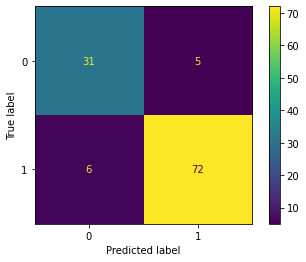

In [47]:
accuracy14=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    sv3 = SVC(C=C, degree=degree )
    sv3.fit(X_train, y_train)
    y_pred = sv3.predict(X_test)

    accuracy14.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy14)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy14))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

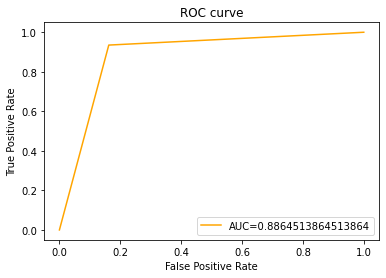

In [48]:
y_pred_proba = sv3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Ada Boost Classifier

Optimal hyperparameter combination: {'algorithm': 'SAMME', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.9363285024154588
Test accuracy: 92.98245614035088
Precision: 89.47368421052632
Recall: 100.0
F1 score: 94.44444444444444
AUC score: 0.9130434782608696
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.9252657004830918
Test accuracy: 91.22807017543859
Precision: 93.58974358974359
Recall: 93.58974358974359
F1 score: 93.58974358974359
AUC score: 0.8985042735042735
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.9077777777777778
Test accuracy: 95.6140350877193
Precision: 95.7

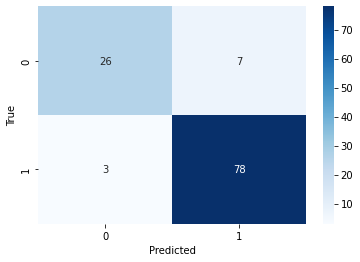

In [49]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list10=[]
ac_list10=[]
   
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_4 = GridSearchCV(ab, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_4.best_params_)
    best_params_list10.append(gs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_4.best_score_)
    gs_4.best_estimator_.fit(X_train, y_train)
    y_pred = gs_4.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list10.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 92.10526315789473
Precision: 94.81333187112564
Recall: 92.68627075814523
f1_score: 93.6969516524021
AUC: 0.9195703813761014
Standard deviation of accuracy:  0.026448363559452952
Standard deviation of precision:  0.028299092328391035
Standard deviation of recall:  0.02994092126839037
Standard deviation of f1_score:  0.021703743725201025
Standard deviation of AUC:  0.02810297132462962


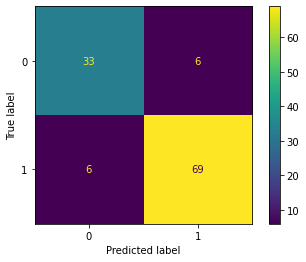

In [50]:
accuracy15=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list10[ac_list10.index(max(ac_list10))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab1 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab1.fit(X_train, y_train)
    y_pred = ab1.predict(X_test)
    
    accuracy15.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy15)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy15))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

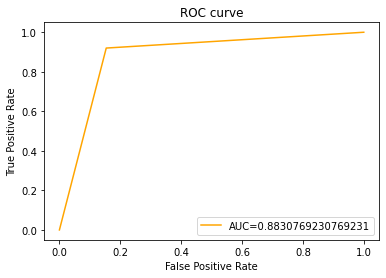

In [51]:
y_pred_proba = ab1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.9472463768115942
Test accuracy: 91.22807017543859
Precision: 91.42857142857143
Recall: 94.11764705882352
F1 score: 92.75362318840578
AUC score: 0.9053708439897697
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.9296618357487922
Test accuracy: 96.49122807017544
Precision: 97.2972972972973
Recall: 97.2972972972973
F1 score: 97.2972972972973
AUC score: 0.9614864864864865
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.925024154589372
Test accuracy: 95.6140350877193
Precision: 

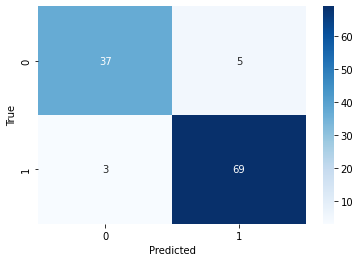

In [52]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list11=[]
ac_list11=[]
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_4 = RandomizedSearchCV(ab, param_distributions=hyperparameter_space,
                            scoring="accuracy",
                            n_jobs=-1, cv=10, return_train_score=True)

    rs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_4.best_params_)
    best_params_list11.append(rs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_4.best_score_)
    rs_4.best_estimator_.fit(X_train, y_train)
    y_pred = rs_4.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list11.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 92.3859649122807
Precision: 94.89351055692904
Recall: 93.13382423563202
f1_score: 93.93416394975645
AUC: 0.9217500289395718
Standard deviation of accuracy:  0.02629747132544993
Standard deviation of precision:  0.0343060255456313
Standard deviation of recall:  0.03310084951363823
Standard deviation of f1_score:  0.021981796378350054
Standard deviation of AUC:  0.029863388233007087


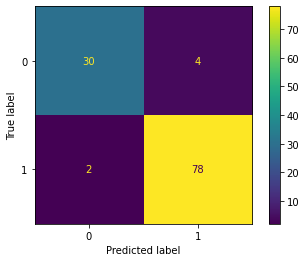

In [53]:
accuracy16=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list11[ac_list11.index(max(ac_list11))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab2 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab2.fit(X_train, y_train)
    y_pred = ab2.predict(X_test)
    accuracy16.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy16)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy16))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

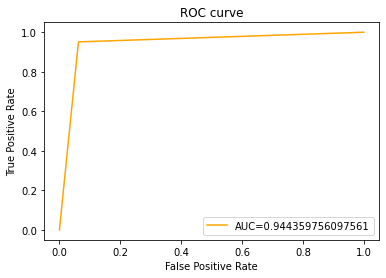

In [54]:
y_pred_proba = ab2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [55]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()

params_gbm ={
    'n_estimators':(3,10)
}

def gbm_cl_bo(n_estimators):
    params_gbm = {}
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = ab
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_4 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_4.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_4.max['params']
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.9123    | 5.622     |
| 2         | 0.9123    | 9.655     |
| 3         | 0.9123    | 8.124     |
| 4         | 0.9123    | 7.191     |
| 5         | 0.9123    | 4.092     |
| 6         | 0.9123    | 4.092     |
| 7         | 0.9123    | 3.407     |
| 8         | 0.9123    | 9.063     |
| 9         | 0.9123    | 7.208     |
| 10        | 0.9123    | 7.957     |
| 11        | 0.9123    | 6.522     |
| 12        | 0.9123    | 3.752     |
| 13        | 0.9123    | 5.349     |
| 14        | 0.9123    | 5.098     |
Accuracy: 91.22807017543859
Precision: 91.42857142857143
F1-Score: 92.75362318840578
Recall: 94.11764705882352
AUC: 0.9053708439897697
Best hyperparameters:
{'n_estimators': 6}
Execution time of Bayesian Optimization (in Seconds): 1.2936272621154785


Accuracy: 91.64912280701752
Precision: 94.46538447110109
Recall: 92.25433042778647
f1_score: 93.29111734555221
AUC: 0.9151780521801233
Standard deviation of accuracy:  0.02959591709973918
Standard deviation of precision:  0.03330783802885897
Standard deviation of recall:  0.03450388363066963
Standard deviation of f1_score:  0.025278836841204376
Standard deviation of AUC:  0.0319917063450253


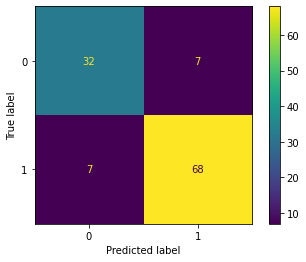

In [56]:
accuracy17=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab3 = AdaBoostClassifier( n_estimators= n_estimators )
    ab3.fit(X_train, y_train)
    y_pred = ab3.predict(X_test)

    accuracy17.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy17)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy17))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

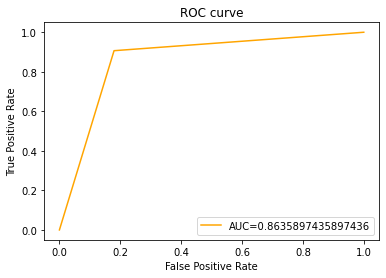

In [57]:
y_pred_proba = ab3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression

Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.9253623188405797
Test accuracy: 93.85964912280701
Precision: 92.85714285714286
Recall: 97.01492537313433
F1 score: 94.8905109489051
AUC score: 0.9318831375039694
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.9251690821256039
Test accuracy: 93.85964912280701
Precision: 96.96969696969697
Recall: 92.7536231884058
F1 score: 94.81481481481481
AUC score: 0.9415458937198069
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.9252657004830919
Test accuracy

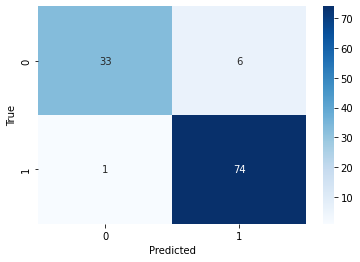

In [58]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list13=[]
ac_list13=[]   
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_5 = GridSearchCV(lg, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_5.best_params_)
    best_params_list13.append(gs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_5.best_score_)
    gs_5.best_estimator_.fit(X_train, y_train)
    y_pred = gs_5.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list13.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 91.94736842105263
Precision: 95.77332224235258
Recall: 91.84675695608622
f1_score: 93.71632859883351
AUC: 0.9202032146684236
Standard deviation of accuracy:  0.0230024749367014
Standard deviation of precision:  0.024247067593711685
Standard deviation of recall:  0.03237451153480433
Standard deviation of f1_score:  0.018712451650100985
Standard deviation of AUC:  0.023757570072114733


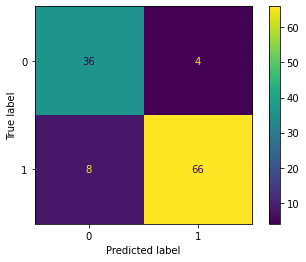

In [59]:
accuracy18=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list13[ac_list13.index(max(ac_list13))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr1 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr1.fit(X_train, y_train)
    y_pred = lr1.predict(X_test)
    
    accuracy18.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy18)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy18))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

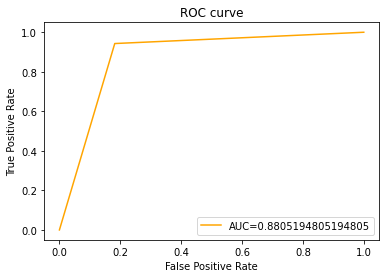

In [60]:
y_pred_proba = lr1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.9229468599033817
Test accuracy: 92.98245614035088
Precision: 97.2972972972973
Recall: 92.3076923076923
F1 score: 94.73684210526315
AUC score: 0.9337606837606838
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.9166183574879228
Test accuracy: 92.10526315789474
Precision: 91.54929577464789
Recall: 95.58823529411765
F1 score: 93.52517985611512
AUC score: 0.9127237851662404
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.9229468599033817
Test accura

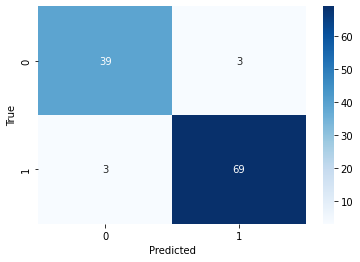

In [61]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list14=[]
ac_list14=[]
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rs_5 = RandomizedSearchCV(lg, param_distributions=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_5.best_params_)
    best_params_list14.append(rs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_5.best_score_)
    rs_5.best_estimator_.fit(X_train, y_train)
    y_pred = rs_5.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list14.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 92.21929824561403
Precision: 95.60786515142082
Recall: 92.34361521923071
f1_score: 93.89816993575674
AUC: 0.921905633151548
Standard deviation of accuracy:  0.0230455161588829
Standard deviation of precision:  0.024113164018647052
Standard deviation of recall:  0.03253678920503733
Standard deviation of f1_score:  0.019407203738775004
Standard deviation of AUC:  0.02406741980061739


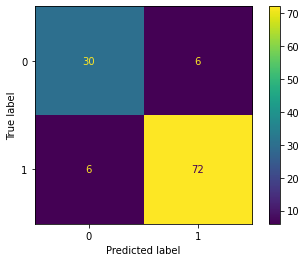

In [62]:
accuracy19=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list14[ac_list14.index(max(ac_list14))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr2 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr2.fit(X_train, y_train)
    y_pred = lr2.predict(X_test)
    
    accuracy19.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy19)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy19))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

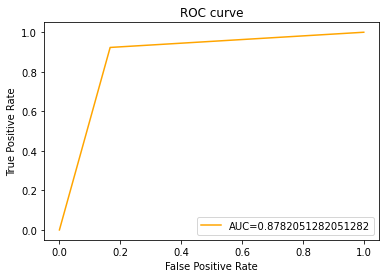

In [63]:
y_pred_proba = lr2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()
params_gbm ={
    'max_iter':(500,1000), 
    'C':(0.1, 10),
    'intercept_scaling':(1.0,3.0)
}

# LogisticRegression Machine
def gbm_cl_bo(max_iter, C, intercept_scaling):
    params_gbm = {}
    params_gbm['max_iter'] = round(max_iter)
    params_gbm['C'] = C
    params_gbm['intercept_scaling'] = intercept_scaling
    
    model = lg
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)*100))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_5 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_5.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_5.max['params']
params_gbm['max_iter'] = round(params_gbm['max_iter'])
params_gbm['C'] = round(params_gbm['C'])
params_gbm['intercept_scaling'] = round(params_gbm['intercept_scaling'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     | interc... | max_iter  |
-------------------------------------------------------------
| 1         | 0.9123    | 3.808     | 2.901     | 866.0     |
| 2         | 0.9123    | 6.027     | 1.312     | 578.0     |
| 3         | 0.9123    | 0.675     | 2.732     | 800.6     |
| 4         | 0.9123    | 7.11      | 1.041     | 985.0     |
| 5         | 0.9123    | 8.341     | 1.425     | 590.9     |
| 6         | 0.9123    | 1.916     | 1.608     | 762.4     |
| 7         | 0.9123    | 4.376     | 1.582     | 805.9     |
| 8         | 0.9123    | 1.481     | 1.584     | 683.2     |
| 9         | 0.9123    | 4.615     | 2.57      | 599.8     |
| 10        | 0.9123    | 5.191     | 2.185     | 523.2     |
| 11        | 0.9123    | 9.716     | 2.265     | 992.9     |
| 12        | 0.9123    | 1.692     | 1.798     | 543.3     |
| 13        | 0.9123    | 3.32      | 1.958     | 571.4     |
| 14        | 0.9123    | 9.436     | 1.736     | 610.6     |
Accuracy

Accuracy: 92.28070175438596
Precision: 96.73116234279104
Recall: 91.7569866138088
f1_score: 94.1302503736819
AUC: 0.927142132974209
Standard deviation of accuracy:  0.016948978650513966
Standard deviation of precision:  0.022990895679699613
Standard deviation of recall:  0.030030990462842796
Standard deviation of f1_score:  0.014684486812924509
Standard deviation of AUC:  0.019677728282814663


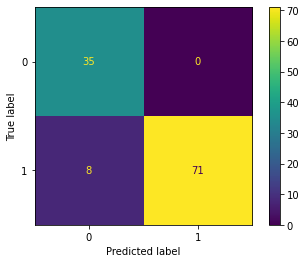

In [65]:
accuracy20=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr3 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr3.fit(X_train, y_train)
    y_pred = lr3.predict(X_test)
    
    accuracy20.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy20)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy20))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

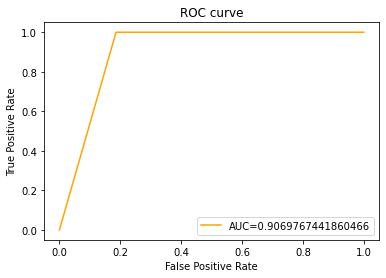

In [66]:
y_pred_proba = lr3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Neural Network Model

6/6 [==============================] - 0s 799us/step
Accuracy: 65.63334261579875
Precision: 87.93336947508433
Recall: 70.44721043138227
f1_score: 74.52909671149051
AUC: 0.6397653454967359
Standard deviation of accuracy:  0.10134935978807684
Standard deviation of precision:  0.22012576555218094
Standard deviation of recall:  0.12516310336579725
Standard deviation of f1_score:  0.1455786523636591


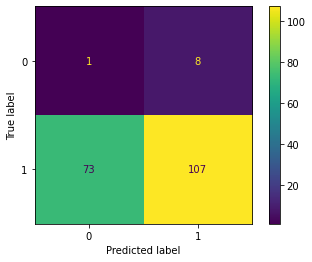

In [67]:
nnaccuracy=[]
nnprecision=[]
nnrecall=[]
nnf1score=[]
nnauc=[]

def NeuralNet():
    model = Sequential()
    model.add(Dense(3, input_shape=(5,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)
for train_index, test_index in cv.split(X,y_label):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_label[train_index], y_label[test_index]
    
    nn = KerasClassifier(build_fn=NeuralNet)   #create the NN model
    nn.fit(X_train, y_train)                   #train the model
    y_pred = nn.predict(X_test)                  # Predictions
    
    nnaccuracy.append(accuracy_score(y_pred, y_test))
    nnprecision.append(precision_score(y_pred, y_test))
    nnrecall.append(recall_score(y_pred, y_test))
    nnf1score.append(f1_score(y_pred, y_test))
    try:
        nnauc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval=['0','1']
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
    
print('Accuracy:', np.mean(nnaccuracy)*100)
print('Precision:', np.mean(nnprecision)*100)
print('Recall:', np.mean(nnrecall)*100)
print('f1_score:', np.mean(nnf1score)*100)
print('AUC:',np.mean(nnauc))

print('Standard deviation of accuracy: ', statistics.stdev(nnaccuracy))
print('Standard deviation of precision: ', statistics.stdev(nnprecision))
print('Standard deviation of recall: ', statistics.stdev(nnrecall))
print('Standard deviation of f1_score: ', statistics.stdev(nnf1score))

6/6 [==============================] - 0s 799us/step


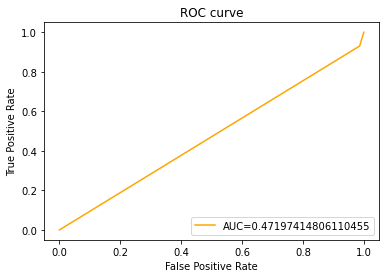

In [68]:
y_pred_proba = nn.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameter Tuning of neural network model

In [69]:
LeakyReLU = LeakyReLU(alpha=0.1)
pd.set_option("display.max_columns", None)
score_acc = make_scorer(accuracy_score)

In [70]:
#-----------------------------------------------------Bayesian Optimization--------------------------------------------------#
row, col=X.shape
l=[]
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=5, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    nm = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    model1 = nm
    model1.fit(X_train, y_train)
    y_score = model1.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l[1].append(accuracy_score(y_test, y_score)*100)
    l[2].append(precision_score(y_test, y_score)*100)
    l[3].append(f1_score(y_test, y_score)*100)
    l[4].append(recall_score(y_test, y_score)*100)
    l[5].append(roc_auc_score(y_test, y_score)*100)
    l[0].append(f)
    return l[0][0]

params_nn2 ={
    'neurons': (1, 5),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.001, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=42)
nn_bo.maximize(init_points=10, n_iter=4)
start = time.time()

params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['dropout'] = round(params_nn_['dropout'])
params_nn_['dropout_rate'] = round(params_nn_['normalization'])
params_nn_['normalization'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]

print("Accuracy:", np.mean(l[1]))
print("Precision:", np.mean(l[2]))
print("F1-Score:" , np.mean(l[3]))
print("Recall:", np.mean(l[4])) 
print("AUC:", np.mean(l[5])) 
print('It takes %s minutes' % ((time.time() - start)/60))
print('-----------------------------------')
print('Best hyperparameters:')
params_nn_

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9474    | 3.371     | 960.6     | 0.732     | 0.1796    | 32.48     | 1.312     | 1.116     | 0.8663    | 3.404     | 0.7081    | 0.1441    |
| 2         | 0.9474    | 8.729     | 866.0     | 0.2123    | 0.05455   | 34.67     | 1.608     | 2.05      | 0.4325    | 2.165     | 0.6119    | 0.9765    |
| 3         | 0.9474    | 2.629     | 493.1     | 0.4561    | 0.2356    | 35.97     | 2.028     | 2.185     | 0.0474    | 3.43      | 0.1705    | 0.4554    |
| 4         | 0.9474    | 8.54      | 972.5     | 0.8084    | 0.09138   | 27.81     | 2.368     | 1.88      | 0.1229    | 2.981     | 0.03439   | 6.365     |
| 5         | 0.9474    | 2.329     | 730.0     | 0.

{'activation': 'softsign',
 'batch_size': 961,
 'dropout': 1,
 'dropout_rate': 1,
 'epochs': 32,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.8663099696291603,
 'neurons': 3,
 'normalization': 1,
 'optimizer': <keras.optimizers.legacy.adam.Adam at 0x19646c3de50>}

4/4 [==============================] - 0s 636us/step
Accuracy: 66.51754385964914
Precision: 93.33374341693231
Recall: 68.43976700669242
f1_score: 77.08004753641376
AUC: 0.7133403457722653
Standard deviation of accuracy:  0.09551611261088597
Standard deviation of precision:  0.15858593568657003
Standard deviation of recall:  0.10106313435068405
Standard deviation of f1_score:  0.09916671127524722
Standard deviation of AUC:  0.17748874100368447


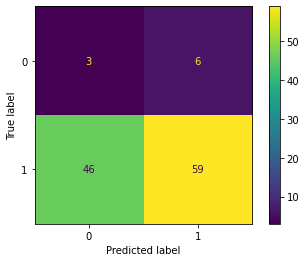

In [71]:
accuracy21=[]
precision=[]
recall=[]
f1score=[]
auc=[]

def NeuralNetbayesian():
    par=params_nn_
    activation=par['activation']
    batch_size=par['batch_size']
    dropout=par['dropout']
    dropout_rate=par['dropout_rate']
    epochs=par['epochs']
    layers1=par['layers1']
    layers2=par['layers2']
    learning_rate=par['learning_rate']
    neurons=par['neurons']
    normalization=par['normalization']
    optimizer=par['optimizer']

    model = Sequential()
    model.add(Dense(3, input_shape=(5,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kb = KerasClassifier(build_fn=NeuralNetbayesian)
    kb.fit(X_train, y_train)
    y_pred = kb.predict(X_test)
    
    accuracy21.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy21)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy21))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

4/4 [==============================] - 0s 840us/step


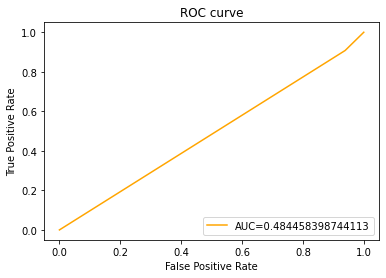

In [72]:
y_pred_proba = kb.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [73]:
#----------------------------------------------------------GridSearchCV-----------------------------------------------------#
# Function to create model
row,col=X.shape
best_params_list15=[]
ac_list15=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(3, input_shape=(5,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size=(200, 1000)
epochs=(20, 100)
learn_rate=(0.001, 1)
optimizer=(0,7)
activation=(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate=(0,0.3) 
neurons=(1, 5)

start = time.time()

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    best_params_list15.append(grid_result.best_params_)
    
    y_pred = grid.best_estimator_.predict(X_test)                                 # Predictions
    y_true = y_test                                                               # True values
    
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list15.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
print('It takes %s minutes' % ((time.time() - start)/60))
print()

Best: 0.834945 using {'batch_size': 200, 'epochs': 100, 'optimizer': 7, 'optimizer__activation': 9, 'optimizer__dropout_rate': 0.3, 'optimizer__learning_rate': 0.001, 'optimizer__neurons': 5, 'optimizer__weight_constraint': 1.0}
Test accuracy: 69.2982456140351
Precision: 64.64646464646465
Recall: 100.0
F1 score: 78.52760736196319
AUC score: 0.65
------------------------------------------------------------------------------------------------------------------
Best: 0.848321 using {'batch_size': 200, 'epochs': 100, 'optimizer': 0, 'optimizer__activation': 0, 'optimizer__dropout_rate': 0.3, 'optimizer__learning_rate': 0.001, 'optimizer__neurons': 1, 'optimizer__weight_constraint': 1.0}
Test accuracy: 56.14035087719298
Precision: 56.14035087719298
Recall: 100.0
F1 score: 71.91011235955057
AUC score: 0.5
------------------------------------------------------------------------------------------------------------------
Best: 0.857166 using {'batch_size': 200, 'epochs': 100, 'optimizer': 0, 'o

4/4 [==============================] - 0s 999us/step
Accuracy: 68.24561403508773
Precision: 94.93341561517144
Recall: 69.00983646183926
f1_score: 78.78555621632155
AUC: 0.7060478536081579
Standard deviation of accuracy:  0.09300903394742228
Standard deviation of precision:  0.11684985761046131
Standard deviation of recall:  0.1014994551875274
Standard deviation of f1_score:  0.0718295539206707
Standard deviation of AUC:  0.1887387819605359


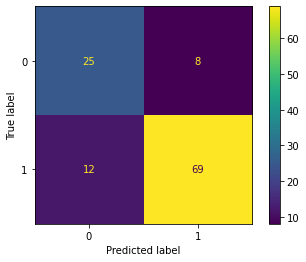

In [74]:
accuracy22=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetgrid():
    par=best_params_list15[ac_list15.index(max(ac_list15))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(3, input_shape=(5,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kg = KerasClassifier(build_fn=NeuralNetgrid)
    kg.fit(X_train, y_train)
    y_pred = kg.predict(X_test)
    
    accuracy22.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy22)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy22))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

4/4 [==============================] - 0s 665us/step


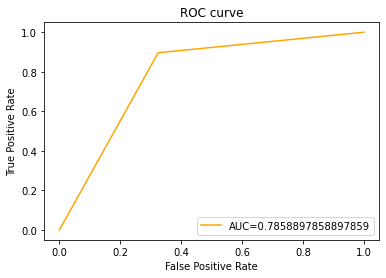

In [75]:
y_pred_proba = kg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [76]:
#-----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
# Function to create model
best_params_list16=[]
ac_list16=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(3, input_shape=(5,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the random search parameters
batch_size:(200, 1000)
epochs:(20, 100)
learn_rate:(0.001, 1)
optimizer:(0,7)
activation:(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate:(0,0.3) 
neurons: (1, 5)

start = time.time()
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    rndm = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
    rndm_result = rndm.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (rndm_result.best_score_, rndm_result.best_params_))
    means = rndm_result.cv_results_['mean_test_score']
    stds = rndm_result.cv_results_['std_test_score']
    params = rndm_result.cv_results_['params']
    best_params_list16.append(rndm_result.best_params_)
    
    y_pred = rndm.best_estimator_.predict(X_test)  # Predictions
    y_true = y_test                                # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list16.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

print('It takes %s minutes' % ((time.time() - start)/60))

Best: 0.822020 using {'optimizer__weight_constraint': 2.0, 'optimizer__neurons': 5, 'optimizer__learning_rate': 1, 'optimizer__dropout_rate': 0.3, 'optimizer__activation': 9, 'optimizer': 7, 'epochs': 100, 'batch_size': 200}
Test accuracy: 72.80701754385966
Precision: 69.3069306930693
Recall: 100.0
F1 score: 81.87134502923976
AUC score: 0.6477272727272727
------------------------------------------------------------------------------------------------------------------
Best: 0.751859 using {'optimizer__weight_constraint': 2.0, 'optimizer__neurons': 5, 'optimizer__learning_rate': 1, 'optimizer__dropout_rate': 0, 'optimizer__activation': 0, 'optimizer': 0, 'epochs': 100, 'batch_size': 1000}
Test accuracy: 64.03508771929825
Precision: 64.03508771929825
Recall: 100.0
F1 score: 78.07486631016043
AUC score: 0.5
------------------------------------------------------------------------------------------------------------------
Best: 0.769475 using {'optimizer__weight_constraint': 1.0, 'optimizer

4/4 [==============================] - 0s 666us/step
Accuracy: 67.64035087719299
Precision: 93.57139254281805
Recall: 69.28304276106849
f1_score: 77.48543544817362
AUC: 0.7459384196332683
Standard deviation of accuracy:  0.10174044494378849
Standard deviation of precision:  0.1697180957890097
Standard deviation of recall:  0.1050215515176565
Standard deviation of f1_score:  0.11570143734314617
Standard deviation of AUC:  0.15938456665673495


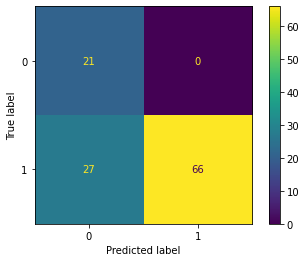

In [77]:
accuracy23=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetrandom():
    par=best_params_list16[ac_list16.index(max(ac_list16))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(3, input_shape=(5,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kr = KerasClassifier(build_fn=NeuralNetrandom)
    kr.fit(X_train, y_train)
    y_pred = kr.predict(X_test)
    
    accuracy23.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()  

print('Accuracy:', np.mean(accuracy23)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy23))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

4/4 [==============================] - 0s 997us/step


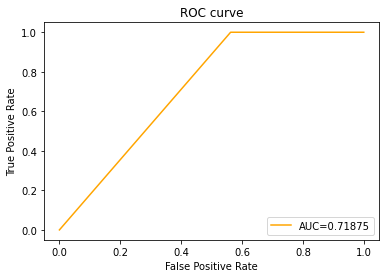

In [78]:
y_pred_proba = kr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## WILCOXON SIGNED RANK TEST

In [81]:
#-----------------------------------------------WILCOXON SIGNED RANK TEST------------------------------------------------------#
import random
ac_sv=[]
ac_rf=[]
ac_ab=[]
ac_gb=[]
ac_lg=[]
ac_nn=[]
row, col=X.shape

for i in range(5000):
    print(i)
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train_1=X.iloc[training_indices]
    X_test_1=X.iloc[test_indices]
    y_train_1=y[training_indices]
    y_test_1=y[test_indices]
    
    
    sv1.fit(X_train_1, y_train_1)
    pred1= sv1.predict(X_test_1)
    ac_sv.append(accuracy_score(y_test_1, pred1))
    
    rf2.fit(X_train_1, y_train_1)
    pred2= rf2.predict(X_test_1)
    ac_rf.append(accuracy_score(y_test_1, pred2))
    
    ab2.fit(X_train_1, y_train_1)
    pred3= ab2.predict(X_test_1)
    ac_ab.append(accuracy_score(y_test_1, pred3))
    
    gb1.fit(X_train_1, y_train_1)
    pred4= gb1.predict(X_test_1)
    ac_gb.append(accuracy_score(y_test_1, pred4))
    
    lr3.fit(X_train_1, y_train_1)
    pred5= lr3.predict(X_test_1)
    ac_lg.append(accuracy_score(y_test_1, pred5))
    
    kg.fit(X_train_1, y_train_1)
    pred6= kg.predict(X_test_1)
    ac_nn.append(accuracy_score(y_test_1, pred6))
    
alpha=0.05
stat,w1=stats.wilcoxon(ac_gb, ac_sv, zero_method='zsplit')
print(w1)
if(w1<alpha):
    print("reject null hypothesis-1")
stat,w2=stats.wilcoxon(ac_rf, ac_sv, zero_method='zsplit')
print(w2)
if(w2<alpha):
    print("reject null hypothesis-2")
stat,w3=stats.wilcoxon(ac_lg, ac_sv, zero_method='zsplit')
print(w3)
if(w3<alpha):
    print("reject null hypothesis-3")
stat,w4=stats.wilcoxon(ac_ab, ac_sv, zero_method='zsplit')
print(w4)
if(w4<alpha):
    print("reject null hypothesis-4")
stat,w5=stats.wilcoxon(ac_nn, ac_sv, zero_method='zsplit')
print(w5)
if(w5<alpha):
    print("reject null hypothesis-5")

0
4/4 [==============================] - 0s 997us/step
1
4/4 [==============================] - 0s 1ms/step
2
4/4 [==============================] - 0s 849us/step
3
4/4 [==============================] - 0s 997us/step
4
4/4 [==============================] - 0s 998us/step
5
4/4 [==============================] - 0s 1ms/step
6
4/4 [==============================] - 0s 1ms/step
7
4/4 [==============================] - 0s 998us/step
8
4/4 [==============================] - 0s 998us/step
9
4/4 [==============================] - 0s 666us/step
10
4/4 [==============================] - 0s 998us/step
11
4/4 [==============================] - 0s 849us/step
12
4/4 [==============================] - 0s 998us/step
13
4/4 [==============================] - 0s 900us/step
14
4/4 [==============================] - 0s 1ms/step
15
4/4 [==============================] - 0s 839us/step
16
4/4 [==============================] - 0s 1000us/step
17
4/4 [==============================] - 0s 838us/step
18
4/4 [=

57
4/4 [==============================] - 0s 836us/step
58
4/4 [==============================] - 0s 998us/step
59
4/4 [==============================] - 0s 998us/step
60
4/4 [==============================] - 0s 807us/step
61
4/4 [==============================] - 0s 666us/step
62
4/4 [==============================] - 0s 666us/step
63
4/4 [==============================] - 0s 836us/step
64
4/4 [==============================] - 0s 834us/step
65
4/4 [==============================] - 0s 753us/step
66
4/4 [==============================] - 0s 931us/step
67
4/4 [==============================] - 0s 835us/step
68
4/4 [==============================] - 0s 803us/step
69
4/4 [==============================] - 0s 1ms/step
70
4/4 [==============================] - 0s 666us/step
71
4/4 [==============================] - 0s 999us/step
72
4/4 [==============================] - 0s 996us/step
73
4/4 [==============================] - 0s 666us/step
74
4/4 [==============================] - 0s 772us

4/4 [==============================] - 0s 666us/step
170
4/4 [==============================] - 0s 666us/step
171
4/4 [==============================] - 0s 667us/step
172
4/4 [==============================] - 0s 666us/step
173
4/4 [==============================] - 0s 666us/step
174
4/4 [==============================] - 0s 676us/step
175
4/4 [==============================] - 0s 999us/step
176
4/4 [==============================] - 0s 666us/step
177
4/4 [==============================] - 0s 666us/step
178
4/4 [==============================] - 0s 999us/step
179
4/4 [==============================] - 0s 666us/step
180
4/4 [==============================] - 0s 666us/step
181
4/4 [==============================] - 0s 998us/step
182
4/4 [==============================] - 0s 998us/step
183
4/4 [==============================] - 0s 835us/step
184
4/4 [==============================] - 0s 666us/step
185
4/4 [==============================] - 0s 834us/step
186
4/4 [==========================

4/4 [==============================] - 0s 998us/step
282
4/4 [==============================] - 0s 693us/step
283
4/4 [==============================] - 0s 834us/step
284
4/4 [==============================] - 0s 834us/step
285
4/4 [==============================] - 0s 997us/step
286
4/4 [==============================] - 0s 835us/step
287
4/4 [==============================] - 0s 998us/step
288
4/4 [==============================] - 0s 998us/step
289
4/4 [==============================] - 0s 998us/step
290
4/4 [==============================] - 0s 665us/step
291
4/4 [==============================] - 0s 666us/step
292
4/4 [==============================] - 0s 998us/step
293
4/4 [==============================] - 0s 665us/step
294
4/4 [==============================] - 0s 760us/step
295
4/4 [==============================] - 0s 998us/step
296
4/4 [==============================] - 0s 666us/step
297
4/4 [==============================] - 0s 666us/step
298
4/4 [==========================

4/4 [==============================] - 0s 998us/step
394
4/4 [==============================] - 0s 837us/step
395
4/4 [==============================] - 0s 998us/step
396
4/4 [==============================] - 0s 666us/step
397
4/4 [==============================] - 0s 1ms/step
398
4/4 [==============================] - 0s 666us/step
399
4/4 [==============================] - 0s 713us/step
400
4/4 [==============================] - 0s 998us/step
401
4/4 [==============================] - 0s 667us/step
402
4/4 [==============================] - 0s 834us/step
403
4/4 [==============================] - 0s 998us/step
404
4/4 [==============================] - 0s 834us/step
405
4/4 [==============================] - 0s 998us/step
406
4/4 [==============================] - 0s 834us/step
407
4/4 [==============================] - 0s 834us/step
408
4/4 [==============================] - 0s 998us/step
409
4/4 [==============================] - 0s 834us/step
410
4/4 [============================

4/4 [==============================] - 0s 998us/step
506
4/4 [==============================] - 0s 959us/step
507
4/4 [==============================] - 0s 666us/step
508
4/4 [==============================] - 0s 665us/step
509
4/4 [==============================] - 0s 666us/step
510
4/4 [==============================] - 0s 998us/step
511
4/4 [==============================] - 0s 666us/step
512
4/4 [==============================] - 0s 666us/step
513
4/4 [==============================] - 0s 666us/step
514
4/4 [==============================] - 0s 666us/step
515
4/4 [==============================] - 0s 997us/step
516
4/4 [==============================] - 0s 666us/step
517
4/4 [==============================] - 0s 997us/step
518
4/4 [==============================] - 0s 666us/step
519
4/4 [==============================] - 0s 998us/step
520
4/4 [==============================] - 0s 666us/step
521
4/4 [==============================] - 0s 666us/step
522
4/4 [==========================

4/4 [==============================] - 0s 834us/step
618
4/4 [==============================] - 0s 667us/step
619
4/4 [==============================] - 0s 997us/step
620
4/4 [==============================] - 0s 998us/step
621
4/4 [==============================] - 0s 999us/step
622
4/4 [==============================] - 0s 666us/step
623
4/4 [==============================] - 0s 834us/step
624
4/4 [==============================] - 0s 834us/step
625
4/4 [==============================] - 0s 836us/step
626
4/4 [==============================] - 0s 999us/step
627
4/4 [==============================] - 0s 666us/step
628
4/4 [==============================] - 0s 765us/step
629
4/4 [==============================] - 0s 998us/step
630
4/4 [==============================] - 0s 666us/step
631
4/4 [==============================] - 0s 999us/step
632
4/4 [==============================] - 0s 666us/step
633
4/4 [==============================] - 0s 666us/step
634
4/4 [==========================

4/4 [==============================] - 0s 998us/step
730
4/4 [==============================] - 0s 999us/step
731
4/4 [==============================] - 0s 998us/step
732
4/4 [==============================] - 0s 998us/step
733
4/4 [==============================] - 0s 837us/step
734
4/4 [==============================] - 0s 666us/step
735
4/4 [==============================] - 0s 836us/step
736
4/4 [==============================] - 0s 666us/step
737
4/4 [==============================] - 0s 664us/step
738
4/4 [==============================] - 0s 1ms/step
739
4/4 [==============================] - 0s 834us/step
740
4/4 [==============================] - 0s 662us/step
741
4/4 [==============================] - 0s 834us/step
742
4/4 [==============================] - 0s 998us/step
743
4/4 [==============================] - 0s 998us/step
744
4/4 [==============================] - 0s 666us/step
745
4/4 [==============================] - 0s 999us/step
746
4/4 [============================

4/4 [==============================] - 0s 666us/step
842
4/4 [==============================] - 0s 999us/step
843
4/4 [==============================] - 0s 998us/step
844
4/4 [==============================] - 0s 665us/step
845
4/4 [==============================] - 0s 847us/step
846
4/4 [==============================] - 0s 997us/step
847
4/4 [==============================] - 0s 998us/step
848
4/4 [==============================] - 0s 997us/step
849
4/4 [==============================] - 0s 999us/step
850
4/4 [==============================] - 0s 998us/step
851
4/4 [==============================] - 0s 835us/step
852
4/4 [==============================] - 0s 707us/step
853
4/4 [==============================] - 0s 665us/step
854
4/4 [==============================] - 0s 666us/step
855
4/4 [==============================] - 0s 666us/step
856
4/4 [==============================] - 0s 667us/step
857
4/4 [==============================] - 0s 666us/step
858
4/4 [==========================

4/4 [==============================] - 0s 998us/step
954
4/4 [==============================] - 0s 666us/step
955
4/4 [==============================] - 0s 665us/step
956
4/4 [==============================] - 0s 666us/step
957
4/4 [==============================] - 0s 666us/step
958
4/4 [==============================] - 0s 999us/step
959
4/4 [==============================] - 0s 835us/step
960
4/4 [==============================] - 0s 666us/step
961
4/4 [==============================] - 0s 666us/step
962
4/4 [==============================] - 0s 666us/step
963
4/4 [==============================] - 0s 839us/step
964
4/4 [==============================] - 0s 666us/step
965
4/4 [==============================] - 0s 666us/step
966
4/4 [==============================] - 0s 759us/step
967
4/4 [==============================] - 0s 666us/step
968
4/4 [==============================] - 0s 666us/step
969
4/4 [==============================] - 0s 998us/step
970
4/4 [==========================

4/4 [==============================] - 0s 998us/step
1065
4/4 [==============================] - 0s 999us/step
1066
4/4 [==============================] - 0s 666us/step
1067
4/4 [==============================] - 0s 666us/step
1068
4/4 [==============================] - 0s 665us/step
1069
4/4 [==============================] - 0s 834us/step
1070
4/4 [==============================] - 0s 666us/step
1071
4/4 [==============================] - 0s 834us/step
1072
4/4 [==============================] - 0s 666us/step
1073
4/4 [==============================] - 0s 844us/step
1074
4/4 [==============================] - 0s 666us/step
1075
4/4 [==============================] - 0s 666us/step
1076
4/4 [==============================] - 0s 871us/step
1077
4/4 [==============================] - 0s 666us/step
1078
4/4 [==============================] - 0s 666us/step
1079
4/4 [==============================] - 0s 666us/step
1080
4/4 [==============================] - 0s 882us/step
1081
4/4 [=========

4/4 [==============================] - 0s 999us/step
1177
4/4 [==============================] - 0s 998us/step
1178
4/4 [==============================] - 0s 997us/step
1179
4/4 [==============================] - 0s 997us/step
1180
4/4 [==============================] - 0s 997us/step
1181
4/4 [==============================] - 0s 997us/step
1182
4/4 [==============================] - 0s 998us/step
1183
4/4 [==============================] - 0s 1ms/step
1184
4/4 [==============================] - 0s 997us/step
1185
4/4 [==============================] - 0s 998us/step
1186
4/4 [==============================] - 0s 998us/step
1187
4/4 [==============================] - 0s 997us/step
1188
4/4 [==============================] - 0s 998us/step
1189
4/4 [==============================] - 0s 997us/step
1190
4/4 [==============================] - 0s 998us/step
1191
4/4 [==============================] - 0s 997us/step
1192
4/4 [==============================] - 0s 998us/step
1193
4/4 [===========

4/4 [==============================] - 0s 997us/step
1290
4/4 [==============================] - 0s 998us/step
1291
4/4 [==============================] - 0s 665us/step
1292
4/4 [==============================] - 0s 997us/step
1293
4/4 [==============================] - 0s 666us/step
1294
4/4 [==============================] - 0s 997us/step
1295
4/4 [==============================] - 0s 1ms/step
1296
4/4 [==============================] - 0s 835us/step
1297
4/4 [==============================] - 0s 998us/step
1298
4/4 [==============================] - 0s 766us/step
1299
4/4 [==============================] - 0s 1ms/step
1300
4/4 [==============================] - 0s 997us/step
1301
4/4 [==============================] - 0s 998us/step
1302
4/4 [==============================] - 0s 997us/step
1303
4/4 [==============================] - 0s 997us/step
1304
4/4 [==============================] - 0s 666us/step
1305
4/4 [==============================] - 0s 666us/step
1306
4/4 [=============

4/4 [==============================] - 0s 1ms/step
1401
4/4 [==============================] - 0s 916us/step
1402
4/4 [==============================] - 0s 834us/step
1403
4/4 [==============================] - 0s 834us/step
1404
4/4 [==============================] - 0s 998us/step
1405
4/4 [==============================] - 0s 666us/step
1406
4/4 [==============================] - 0s 666us/step
1407
4/4 [==============================] - 0s 997us/step
1408
4/4 [==============================] - 0s 666us/step
1409
4/4 [==============================] - 0s 666us/step
1410
4/4 [==============================] - 0s 998us/step
1411
4/4 [==============================] - 0s 998us/step
1412
4/4 [==============================] - 0s 998us/step
1413
4/4 [==============================] - 0s 2ms/step
1414
4/4 [==============================] - 0s 1ms/step
1415
4/4 [==============================] - 0s 999us/step
1416
4/4 [==============================] - 0s 998us/step
1417
4/4 [===============

1512
4/4 [==============================] - 0s 997us/step
1513
4/4 [==============================] - 0s 666us/step
1514
4/4 [==============================] - 0s 665us/step
1515
4/4 [==============================] - 0s 844us/step
1516
4/4 [==============================] - 0s 665us/step
1517
4/4 [==============================] - 0s 997us/step
1518
4/4 [==============================] - 0s 979us/step
1519
4/4 [==============================] - 0s 997us/step
1520
4/4 [==============================] - 0s 998us/step
1521
4/4 [==============================] - 0s 665us/step
1522
4/4 [==============================] - 0s 665us/step
1523
4/4 [==============================] - 0s 993us/step
1524
4/4 [==============================] - 0s 988us/step
1525
4/4 [==============================] - 0s 997us/step
1526
4/4 [==============================] - 0s 993us/step
1527
4/4 [==============================] - 0s 998us/step
1528
4/4 [==============================] - 0s 1ms/step
1529
4/4 [======

4/4 [==============================] - 0s 997us/step
1624
4/4 [==============================] - 0s 666us/step
1625
4/4 [==============================] - 0s 998us/step
1626
4/4 [==============================] - 0s 997us/step
1627
4/4 [==============================] - 0s 998us/step
1628
4/4 [==============================] - 0s 998us/step
1629
4/4 [==============================] - 0s 666us/step
1630
4/4 [==============================] - 0s 997us/step
1631
4/4 [==============================] - 0s 999us/step
1632
4/4 [==============================] - 0s 1ms/step
1633
4/4 [==============================] - 0s 665us/step
1634
4/4 [==============================] - 0s 1ms/step
1635
4/4 [==============================] - 0s 664us/step
1636
4/4 [==============================] - 0s 659us/step
1637
4/4 [==============================] - 0s 666us/step
1638
4/4 [==============================] - 0s 665us/step
1639
4/4 [==============================] - 0s 937us/step
1640
4/4 [=============

4/4 [==============================] - 0s 997us/step
1735
4/4 [==============================] - 0s 665us/step
1736
4/4 [==============================] - 0s 665us/step
1737
4/4 [==============================] - 0s 998us/step
1738
4/4 [==============================] - 0s 998us/step
1739
4/4 [==============================] - 0s 998us/step
1740
4/4 [==============================] - 0s 1ms/step
1741
4/4 [==============================] - 0s 997us/step
1742
4/4 [==============================] - 0s 1ms/step
1743
4/4 [==============================] - 0s 998us/step
1744
4/4 [==============================] - 0s 1ms/step
1745
4/4 [==============================] - 0s 998us/step
1746
4/4 [==============================] - 0s 1ms/step
1747
4/4 [==============================] - 0s 861us/step
1748
4/4 [==============================] - 0s 998us/step
1749
4/4 [==============================] - 0s 666us/step
1750
4/4 [==============================] - 0s 665us/step
1751
4/4 [=================

4/4 [==============================] - 0s 836us/step
1846
4/4 [==============================] - 0s 502us/step
1847
4/4 [==============================] - 0s 813us/step
1848
4/4 [==============================] - 0s 666us/step
1849
4/4 [==============================] - 0s 941us/step
1850
4/4 [==============================] - 0s 695us/step
1851
4/4 [==============================] - 0s 785us/step
1852
4/4 [==============================] - 0s 666us/step
1853
4/4 [==============================] - 0s 1ms/step
1854
4/4 [==============================] - 0s 666us/step
1855
4/4 [==============================] - 0s 666us/step
1856
4/4 [==============================] - 0s 1ms/step
1857
4/4 [==============================] - 0s 851us/step
1858
4/4 [==============================] - 0s 666us/step
1859
4/4 [==============================] - 0s 666us/step
1860
4/4 [==============================] - 0s 834us/step
1861
4/4 [==============================] - 0s 1ms/step
1862
4/4 [===============

4/4 [==============================] - 0s 626us/step
1957
4/4 [==============================] - 0s 1ms/step
1958
4/4 [==============================] - 0s 631us/step
1959
4/4 [==============================] - 0s 719us/step
1960
4/4 [==============================] - 0s 999us/step
1961
4/4 [==============================] - 0s 965us/step
1962
4/4 [==============================] - 0s 1ms/step
1963
4/4 [==============================] - 0s 1ms/step
1964
4/4 [==============================] - 0s 909us/step
1965
4/4 [==============================] - 0s 836us/step
1966
4/4 [==============================] - 0s 911us/step
1967
4/4 [==============================] - 0s 914us/step
1968
4/4 [==============================] - 0s 666us/step
1969
4/4 [==============================] - 0s 841us/step
1970
4/4 [==============================] - 0s 1ms/step
1971
4/4 [==============================] - 0s 666us/step
1972
4/4 [==============================] - 0s 939us/step
1973
4/4 [=================

4/4 [==============================] - 0s 1ms/step
2068
4/4 [==============================] - 0s 1ms/step
2069
4/4 [==============================] - 0s 998us/step
2070
4/4 [==============================] - 0s 665us/step
2071
4/4 [==============================] - 0s 666us/step
2072
4/4 [==============================] - 0s 734us/step
2073
4/4 [==============================] - 0s 834us/step
2074
4/4 [==============================] - 0s 1ms/step
2075
4/4 [==============================] - 0s 937us/step
2076
4/4 [==============================] - 0s 1ms/step
2077
4/4 [==============================] - 0s 1ms/step
2078
4/4 [==============================] - 0s 999us/step
2079
4/4 [==============================] - 0s 824us/step
2080
4/4 [==============================] - 0s 916us/step
2081
4/4 [==============================] - 0s 1ms/step
2082
4/4 [==============================] - 0s 958us/step
2083
4/4 [==============================] - 0s 998us/step
2084
4/4 [=====================

4/4 [==============================] - 0s 935us/step
2179
4/4 [==============================] - 0s 919us/step
2180
4/4 [==============================] - 0s 666us/step
2181
4/4 [==============================] - 0s 998us/step
2182
4/4 [==============================] - 0s 666us/step
2183
4/4 [==============================] - 0s 666us/step
2184
4/4 [==============================] - 0s 998us/step
2185
4/4 [==============================] - 0s 666us/step
2186
4/4 [==============================] - 0s 1ms/step
2187
4/4 [==============================] - 0s 743us/step
2188
4/4 [==============================] - 0s 1ms/step
2189
4/4 [==============================] - 0s 666us/step
2190
4/4 [==============================] - 0s 666us/step
2191
4/4 [==============================] - 0s 1ms/step
2192
4/4 [==============================] - 0s 999us/step
2193
4/4 [==============================] - 0s 835us/step
2194
4/4 [==============================] - 0s 998us/step
2195
4/4 [===============

4/4 [==============================] - 0s 998us/step
2290
4/4 [==============================] - 0s 671us/step
2291
4/4 [==============================] - 0s 740us/step
2292
4/4 [==============================] - 0s 780us/step
2293
4/4 [==============================] - 0s 666us/step
2294
4/4 [==============================] - 0s 999us/step
2295
4/4 [==============================] - 0s 800us/step
2296
4/4 [==============================] - 0s 1ms/step
2297
4/4 [==============================] - 0s 672us/step
2298
4/4 [==============================] - 0s 775us/step
2299
4/4 [==============================] - 0s 908us/step
2300
4/4 [==============================] - 0s 1ms/step
2301
4/4 [==============================] - 0s 998us/step
2302
4/4 [==============================] - 0s 1ms/step
2303
4/4 [==============================] - 0s 1ms/step
2304
4/4 [==============================] - 0s 837us/step
2305
4/4 [==============================] - 0s 843us/step
2306
4/4 [=================

4/4 [==============================] - 0s 666us/step
2401
4/4 [==============================] - 0s 666us/step
2402
4/4 [==============================] - 0s 970us/step
2403
4/4 [==============================] - 0s 1ms/step
2404
4/4 [==============================] - 0s 666us/step
2405
4/4 [==============================] - 0s 666us/step
2406
4/4 [==============================] - 0s 938us/step
2407
4/4 [==============================] - 0s 666us/step
2408
4/4 [==============================] - 0s 836us/step
2409
4/4 [==============================] - 0s 1ms/step
2410
4/4 [==============================] - 0s 1ms/step
2411
4/4 [==============================] - 0s 997us/step
2412
4/4 [==============================] - 0s 666us/step
2413
4/4 [==============================] - 0s 998us/step
2414
4/4 [==============================] - 0s 833us/step
2415
4/4 [==============================] - 0s 666us/step
2416
4/4 [==============================] - 0s 953us/step
2417
4/4 [===============

2512
4/4 [==============================] - 0s 835us/step
2513
4/4 [==============================] - 0s 1ms/step
2514
4/4 [==============================] - 0s 770us/step
2515
4/4 [==============================] - 0s 665us/step
2516
4/4 [==============================] - 0s 1000us/step
2517
4/4 [==============================] - 0s 834us/step
2518
4/4 [==============================] - 0s 665us/step
2519
4/4 [==============================] - 0s 899us/step
2520
4/4 [==============================] - 0s 1ms/step
2521
4/4 [==============================] - 0s 818us/step
2522
4/4 [==============================] - 0s 929us/step
2523
4/4 [==============================] - 0s 666us/step
2524
4/4 [==============================] - 0s 998us/step
2525
4/4 [==============================] - 0s 741us/step
2526
4/4 [==============================] - 0s 666us/step
2527
4/4 [==============================] - 0s 854us/step
2528
4/4 [==============================] - 0s 999us/step
2529
4/4 [=======

4/4 [==============================] - 0s 1ms/step
2624
4/4 [==============================] - 0s 771us/step
2625
4/4 [==============================] - 0s 909us/step
2626
4/4 [==============================] - 0s 998us/step
2627
4/4 [==============================] - 0s 998us/step
2628
4/4 [==============================] - 0s 999us/step
2629
4/4 [==============================] - 0s 666us/step
2630
4/4 [==============================] - 0s 998us/step
2631
4/4 [==============================] - 0s 725us/step
2632
4/4 [==============================] - 0s 999us/step
2633
4/4 [==============================] - 0s 836us/step
2634
4/4 [==============================] - 0s 999us/step
2635
4/4 [==============================] - 0s 998us/step
2636
4/4 [==============================] - 0s 666us/step
2637
4/4 [==============================] - 0s 509us/step
2638
4/4 [==============================] - 0s 666us/step
2639
4/4 [==============================] - 0s 769us/step
2640
4/4 [===========

4/4 [==============================] - 0s 1ms/step
2735
4/4 [==============================] - 0s 998us/step
2736
4/4 [==============================] - 0s 1ms/step
2737
4/4 [==============================] - 0s 1ms/step
2738
4/4 [==============================] - 0s 666us/step
2739
4/4 [==============================] - 0s 667us/step
2740
4/4 [==============================] - 0s 1ms/step
2741
4/4 [==============================] - 0s 666us/step
2742
4/4 [==============================] - 0s 836us/step
2743
4/4 [==============================] - 0s 835us/step
2744
4/4 [==============================] - 0s 835us/step
2745
4/4 [==============================] - 0s 835us/step
2746
4/4 [==============================] - 0s 731us/step
2747
4/4 [==============================] - 0s 839us/step
2748
4/4 [==============================] - 0s 997us/step
2749
4/4 [==============================] - 0s 923us/step
2750
4/4 [==============================] - 0s 999us/step
2751
4/4 [=================

4/4 [==============================] - 0s 830us/step
2846
4/4 [==============================] - 0s 665us/step
2847
4/4 [==============================] - 0s 819us/step
2848
4/4 [==============================] - 0s 998us/step
2849
4/4 [==============================] - 0s 1ms/step
2850
4/4 [==============================] - 0s 666us/step
2851
4/4 [==============================] - 0s 999us/step
2852
4/4 [==============================] - 0s 836us/step
2853
4/4 [==============================] - 0s 905us/step
2854
4/4 [==============================] - 0s 702us/step
2855
4/4 [==============================] - 0s 666us/step
2856
4/4 [==============================] - 0s 666us/step
2857
4/4 [==============================] - 0s 836us/step
2858
4/4 [==============================] - 0s 836us/step
2859
4/4 [==============================] - 0s 665us/step
2860
4/4 [==============================] - 0s 835us/step
2861
4/4 [==============================] - 0s 859us/step
2862
4/4 [===========

4/4 [==============================] - 0s 834us/step
2957
4/4 [==============================] - 0s 1ms/step
2958
4/4 [==============================] - 0s 998us/step
2959
4/4 [==============================] - 0s 891us/step
2960
4/4 [==============================] - 0s 998us/step
2961
4/4 [==============================] - 0s 1ms/step
2962
4/4 [==============================] - 0s 665us/step
2963
4/4 [==============================] - 0s 985us/step
2964
4/4 [==============================] - 0s 998us/step
2965
4/4 [==============================] - 0s 848us/step
2966
4/4 [==============================] - 0s 666us/step
2967
4/4 [==============================] - 0s 998us/step
2968
4/4 [==============================] - 0s 666us/step
2969
4/4 [==============================] - 0s 666us/step
2970
4/4 [==============================] - 0s 665us/step
2971
4/4 [==============================] - 0s 835us/step
2972
4/4 [==============================] - 0s 666us/step
2973
4/4 [=============

4/4 [==============================] - 0s 666us/step
3068
4/4 [==============================] - 0s 666us/step
3069
4/4 [==============================] - 0s 833us/step
3070
4/4 [==============================] - 0s 998us/step
3071
4/4 [==============================] - 0s 1ms/step
3072
4/4 [==============================] - 0s 999us/step
3073
4/4 [==============================] - 0s 666us/step
3074
4/4 [==============================] - 0s 672us/step
3075
4/4 [==============================] - 0s 671us/step
3076
4/4 [==============================] - 0s 836us/step
3077
4/4 [==============================] - 0s 1ms/step
3078
4/4 [==============================] - 0s 935us/step
3079
4/4 [==============================] - 0s 668us/step
3080
4/4 [==============================] - 0s 912us/step
3081
4/4 [==============================] - 0s 883us/step
3082
4/4 [==============================] - 0s 1ms/step
3083
4/4 [==============================] - 0s 666us/step
3084
4/4 [===============

4/4 [==============================] - 0s 716us/step
3179
4/4 [==============================] - 0s 666us/step
3180
4/4 [==============================] - 0s 998us/step
3181
4/4 [==============================] - 0s 666us/step
3182
4/4 [==============================] - 0s 666us/step
3183
4/4 [==============================] - 0s 999us/step
3184
4/4 [==============================] - 0s 836us/step
3185
4/4 [==============================] - 0s 690us/step
3186
4/4 [==============================] - 0s 1ms/step
3187
4/4 [==============================] - 0s 666us/step
3188
4/4 [==============================] - 0s 818us/step
3189
4/4 [==============================] - 0s 997us/step
3190
4/4 [==============================] - 0s 740us/step
3191
4/4 [==============================] - 0s 998us/step
3192
4/4 [==============================] - 0s 665us/step
3193
4/4 [==============================] - 0s 1ms/step
3194
4/4 [==============================] - 0s 948us/step
3195
4/4 [=============

4/4 [==============================] - 0s 997us/step
3290
4/4 [==============================] - 0s 630us/step
3291
4/4 [==============================] - 0s 666us/step
3292
4/4 [==============================] - 0s 998us/step
3293
4/4 [==============================] - 0s 997us/step
3294
4/4 [==============================] - 0s 1ms/step
3295
4/4 [==============================] - 0s 799us/step
3296
4/4 [==============================] - 0s 666us/step
3297
4/4 [==============================] - 0s 666us/step
3298
4/4 [==============================] - 0s 666us/step
3299
4/4 [==============================] - 0s 834us/step
3300
4/4 [==============================] - 0s 666us/step
3301
4/4 [==============================] - 0s 667us/step
3302
4/4 [==============================] - 0s 921us/step
3303
4/4 [==============================] - 0s 998us/step
3304
4/4 [==============================] - 0s 678us/step
3305
4/4 [==============================] - 0s 666us/step
3306
4/4 [===========

4/4 [==============================] - 0s 836us/step
3401
4/4 [==============================] - 0s 665us/step
3402
4/4 [==============================] - 0s 666us/step
3403
4/4 [==============================] - 0s 666us/step
3404
4/4 [==============================] - 0s 574us/step
3405
4/4 [==============================] - 0s 666us/step
3406
4/4 [==============================] - 0s 666us/step
3407
4/4 [==============================] - 0s 848us/step
3408
4/4 [==============================] - 0s 998us/step
3409
4/4 [==============================] - 0s 666us/step
3410
4/4 [==============================] - 0s 836us/step
3411
4/4 [==============================] - 0s 907us/step
3412
4/4 [==============================] - 0s 666us/step
3413
4/4 [==============================] - 0s 668us/step
3414
4/4 [==============================] - 0s 798us/step
3415
4/4 [==============================] - 0s 666us/step
3416
4/4 [==============================] - 0s 837us/step
3417
4/4 [=========

4/4 [==============================] - 0s 837us/step
3512
4/4 [==============================] - 0s 666us/step
3513
4/4 [==============================] - 0s 841us/step
3514
4/4 [==============================] - 0s 998us/step
3515
4/4 [==============================] - 0s 836us/step
3516
4/4 [==============================] - 0s 704us/step
3517
4/4 [==============================] - 0s 666us/step
3518
4/4 [==============================] - 0s 857us/step
3519
4/4 [==============================] - 0s 666us/step
3520
4/4 [==============================] - 0s 998us/step
3521
4/4 [==============================] - 0s 834us/step
3522
4/4 [==============================] - 0s 666us/step
3523
4/4 [==============================] - 0s 1ms/step
3524
4/4 [==============================] - 0s 693us/step
3525
4/4 [==============================] - 0s 834us/step
3526
4/4 [==============================] - 0s 999us/step
3527
4/4 [==============================] - 0s 836us/step
3528
4/4 [===========

4/4 [==============================] - 0s 922us/step
3623
4/4 [==============================] - 0s 997us/step
3624
4/4 [==============================] - 0s 836us/step
3625
4/4 [==============================] - 0s 834us/step
3626
4/4 [==============================] - 0s 908us/step
3627
4/4 [==============================] - 0s 1ms/step
3628
4/4 [==============================] - 0s 841us/step
3629
4/4 [==============================] - 0s 849us/step
3630
4/4 [==============================] - 0s 1ms/step
3631
4/4 [==============================] - 0s 666us/step
3632
4/4 [==============================] - 0s 1ms/step
3633
4/4 [==============================] - 0s 666us/step
3634
4/4 [==============================] - 0s 660us/step
3635
4/4 [==============================] - 0s 666us/step
3636
4/4 [==============================] - 0s 998us/step
3637
4/4 [==============================] - 0s 1ms/step
3638
4/4 [==============================] - 0s 836us/step
3639
4/4 [=================

4/4 [==============================] - 0s 835us/step
3735
4/4 [==============================] - 0s 671us/step
3736
4/4 [==============================] - 0s 1ms/step
3737
4/4 [==============================] - 0s 842us/step
3738
4/4 [==============================] - 0s 837us/step
3739
4/4 [==============================] - 0s 670us/step
3740
4/4 [==============================] - 0s 837us/step
3741
4/4 [==============================] - 0s 666us/step
3742
4/4 [==============================] - 0s 665us/step
3743
4/4 [==============================] - 0s 997us/step
3744
4/4 [==============================] - 0s 998us/step
3745
4/4 [==============================] - 0s 999us/step
3746
4/4 [==============================] - 0s 666us/step
3747
4/4 [==============================] - 0s 1ms/step
3748
4/4 [==============================] - 0s 1ms/step
3749
4/4 [==============================] - 0s 997us/step
3750
4/4 [==============================] - 0s 834us/step
3751
4/4 [===============

4/4 [==============================] - 0s 699us/step
3846
4/4 [==============================] - 0s 834us/step
3847
4/4 [==============================] - 0s 835us/step
3848
4/4 [==============================] - 0s 833us/step
3849
4/4 [==============================] - 0s 958us/step
3850
4/4 [==============================] - 0s 998us/step
3851
4/4 [==============================] - 0s 1ms/step
3852
4/4 [==============================] - 0s 836us/step
3853
4/4 [==============================] - 0s 773us/step
3854
4/4 [==============================] - 0s 997us/step
3855
4/4 [==============================] - 0s 998us/step
3856
4/4 [==============================] - 0s 1ms/step
3857
4/4 [==============================] - 0s 667us/step
3858
4/4 [==============================] - 0s 1000us/step
3859
4/4 [==============================] - 0s 999us/step
3860
4/4 [==============================] - 0s 1ms/step
3861
4/4 [==============================] - 0s 666us/step
3862
4/4 [==============

4/4 [==============================] - 0s 666us/step
3957
4/4 [==============================] - 0s 755us/step
3958
4/4 [==============================] - 0s 1ms/step
3959
4/4 [==============================] - 0s 998us/step
3960
4/4 [==============================] - 0s 666us/step
3961
4/4 [==============================] - 0s 1ms/step
3962
4/4 [==============================] - 0s 999us/step
3963
4/4 [==============================] - 0s 666us/step
3964
4/4 [==============================] - 0s 999us/step
3965
4/4 [==============================] - 0s 997us/step
3966
4/4 [==============================] - 0s 666us/step
3967
4/4 [==============================] - 0s 1ms/step
3968
4/4 [==============================] - 0s 666us/step
3969
4/4 [==============================] - 0s 666us/step
3970
4/4 [==============================] - 0s 664us/step
3971
4/4 [==============================] - 0s 1ms/step
3972
4/4 [==============================] - 0s 666us/step
3973
4/4 [=================

4012
4/4 [==============================] - 0s 850us/step
4013
4/4 [==============================] - 0s 834us/step
4014
4/4 [==============================] - 0s 1ms/step
4015
4/4 [==============================] - 0s 666us/step
4016
4/4 [==============================] - 0s 836us/step
4017
4/4 [==============================] - 0s 863us/step
4018
4/4 [==============================] - 0s 666us/step
4019
4/4 [==============================] - 0s 666us/step
4020
4/4 [==============================] - 0s 998us/step
4021
4/4 [==============================] - 0s 998us/step
4022
4/4 [==============================] - 0s 835us/step
4023
4/4 [==============================] - 0s 666us/step
4024
4/4 [==============================] - 0s 998us/step
4025
4/4 [==============================] - 0s 839us/step
4026
4/4 [==============================] - 0s 1ms/step
4027
4/4 [==============================] - 0s 758us/step
4028
4/4 [==============================] - 0s 999us/step
4029
4/4 [========

4/4 [==============================] - 0s 999us/step
4124
4/4 [==============================] - 0s 836us/step
4125
4/4 [==============================] - 0s 999us/step
4126
4/4 [==============================] - 0s 835us/step
4127
4/4 [==============================] - 0s 1ms/step
4128
4/4 [==============================] - 0s 666us/step
4129
4/4 [==============================] - 0s 998us/step
4130
4/4 [==============================] - 0s 836us/step
4131
4/4 [==============================] - 0s 997us/step
4132
4/4 [==============================] - 0s 998us/step
4133
4/4 [==============================] - 0s 998us/step
4134
4/4 [==============================] - 0s 841us/step
4135
4/4 [==============================] - 0s 665us/step
4136
4/4 [==============================] - 0s 807us/step
4137
4/4 [==============================] - 0s 1ms/step
4138
4/4 [==============================] - 0s 998us/step
4139
4/4 [==============================] - 0s 834us/step
4140
4/4 [=============

4/4 [==============================] - 0s 998us/step
4235
4/4 [==============================] - 0s 836us/step
4236
4/4 [==============================] - 0s 999us/step
4237
4/4 [==============================] - 0s 665us/step
4238
4/4 [==============================] - 0s 997us/step
4239
4/4 [==============================] - 0s 1ms/step
4240
4/4 [==============================] - 0s 998us/step
4241
4/4 [==============================] - 0s 1ms/step
4242
4/4 [==============================] - 0s 997us/step
4243
4/4 [==============================] - 0s 841us/step
4244
4/4 [==============================] - 0s 724us/step
4245
4/4 [==============================] - 0s 998us/step
4246
4/4 [==============================] - 0s 615us/step
4247
4/4 [==============================] - 0s 912us/step
4248
4/4 [==============================] - 0s 998us/step
4249
4/4 [==============================] - 0s 998us/step
4250
4/4 [==============================] - 0s 1ms/step
4251
4/4 [===============

4/4 [==============================] - 0s 597us/step
4346
4/4 [==============================] - 0s 948us/step
4347
4/4 [==============================] - 0s 666us/step
4348
4/4 [==============================] - 0s 834us/step
4349
4/4 [==============================] - 0s 998us/step
4350
4/4 [==============================] - 0s 751us/step
4351
4/4 [==============================] - 0s 835us/step
4352
4/4 [==============================] - 0s 666us/step
4353
4/4 [==============================] - 0s 667us/step
4354
4/4 [==============================] - 0s 666us/step
4355
4/4 [==============================] - 0s 997us/step
4356
4/4 [==============================] - 0s 666us/step
4357
4/4 [==============================] - 0s 998us/step
4358
4/4 [==============================] - 0s 955us/step
4359
4/4 [==============================] - 0s 930us/step
4360
4/4 [==============================] - 0s 666us/step
4361
4/4 [==============================] - 0s 910us/step
4362
4/4 [=========

4/4 [==============================] - 0s 838us/step
4457
4/4 [==============================] - 0s 670us/step
4458
4/4 [==============================] - 0s 774us/step
4459
4/4 [==============================] - 0s 834us/step
4460
4/4 [==============================] - 0s 666us/step
4461
4/4 [==============================] - 0s 863us/step
4462
4/4 [==============================] - 0s 666us/step
4463
4/4 [==============================] - 0s 667us/step
4464
4/4 [==============================] - 0s 668us/step
4465
4/4 [==============================] - 0s 835us/step
4466
4/4 [==============================] - 0s 998us/step
4467
4/4 [==============================] - 0s 943us/step
4468
4/4 [==============================] - 0s 832us/step
4469
4/4 [==============================] - 0s 999us/step
4470
4/4 [==============================] - 0s 666us/step
4471
4/4 [==============================] - 0s 998us/step
4472
4/4 [==============================] - 0s 1ms/step
4473
4/4 [===========

4/4 [==============================] - 0s 998us/step
4568
4/4 [==============================] - 0s 942us/step
4569
4/4 [==============================] - 0s 666us/step
4570
4/4 [==============================] - 0s 861us/step
4571
4/4 [==============================] - 0s 788us/step
4572
4/4 [==============================] - 0s 666us/step
4573
4/4 [==============================] - 0s 666us/step
4574
4/4 [==============================] - 0s 836us/step
4575
4/4 [==============================] - 0s 999us/step
4576
4/4 [==============================] - 0s 666us/step
4577
4/4 [==============================] - 0s 997us/step
4578
4/4 [==============================] - 0s 997us/step
4579
4/4 [==============================] - 0s 998us/step
4580
4/4 [==============================] - 0s 1ms/step
4581
4/4 [==============================] - 0s 666us/step
4582
4/4 [==============================] - 0s 875us/step
4583
4/4 [==============================] - 0s 665us/step
4584
4/4 [===========

4/4 [==============================] - 0s 1ms/step
4679
4/4 [==============================] - 0s 802us/step
4680
4/4 [==============================] - 0s 835us/step
4681
4/4 [==============================] - 0s 666us/step
4682
4/4 [==============================] - 0s 836us/step
4683
4/4 [==============================] - 0s 829us/step
4684
4/4 [==============================] - 0s 835us/step
4685
4/4 [==============================] - 0s 998us/step
4686
4/4 [==============================] - 0s 665us/step
4687
4/4 [==============================] - 0s 1ms/step
4688
4/4 [==============================] - 0s 665us/step
4689
4/4 [==============================] - 0s 666us/step
4690
4/4 [==============================] - 0s 998us/step
4691
4/4 [==============================] - 0s 1ms/step
4692
4/4 [==============================] - 0s 835us/step
4693
4/4 [==============================] - 0s 666us/step
4694
4/4 [==============================] - 0s 665us/step
4695
4/4 [===============

4/4 [==============================] - 0s 999us/step
4790
4/4 [==============================] - 0s 836us/step
4791
4/4 [==============================] - 0s 998us/step
4792
4/4 [==============================] - 0s 834us/step
4793
4/4 [==============================] - 0s 948us/step
4794
4/4 [==============================] - 0s 999us/step
4795
4/4 [==============================] - 0s 1ms/step
4796
4/4 [==============================] - 0s 670us/step
4797
4/4 [==============================] - 0s 834us/step
4798
4/4 [==============================] - 0s 998us/step
4799
4/4 [==============================] - 0s 835us/step
4800
4/4 [==============================] - 0s 834us/step
4801
4/4 [==============================] - 0s 998us/step
4802
4/4 [==============================] - 0s 836us/step
4803
4/4 [==============================] - 0s 502us/step
4804
4/4 [==============================] - 0s 1ms/step
4805
4/4 [==============================] - 0s 837us/step
4806
4/4 [=============

4845
4/4 [==============================] - 0s 1ms/step
4846
4/4 [==============================] - 0s 928us/step
4847
4/4 [==============================] - 0s 1ms/step
4848
4/4 [==============================] - 0s 997us/step
4849
4/4 [==============================] - 0s 998us/step
4850
4/4 [==============================] - 0s 937us/step
4851
4/4 [==============================] - 0s 1ms/step
4852
4/4 [==============================] - 0s 1ms/step
4853
4/4 [==============================] - 0s 1ms/step
4854
4/4 [==============================] - 0s 666us/step
4855
4/4 [==============================] - 0s 895us/step
4856
4/4 [==============================] - 0s 666us/step
4857
4/4 [==============================] - 0s 998us/step
4858
4/4 [==============================] - 0s 997us/step
4859
4/4 [==============================] - 0s 998us/step
4860
4/4 [==============================] - 0s 1ms/step
4861
4/4 [==============================] - 0s 998us/step
4862
4/4 [================

4/4 [==============================] - 0s 836us/step
4957
4/4 [==============================] - 0s 666us/step
4958
4/4 [==============================] - 0s 670us/step
4959
4/4 [==============================] - 0s 705us/step
4960
4/4 [==============================] - 0s 666us/step
4961
4/4 [==============================] - 0s 666us/step
4962
4/4 [==============================] - 0s 997us/step
4963
4/4 [==============================] - 0s 992us/step
4964
4/4 [==============================] - 0s 666us/step
4965
4/4 [==============================] - 0s 836us/step
4966
4/4 [==============================] - 0s 836us/step
4967
4/4 [==============================] - 0s 590us/step
4968
4/4 [==============================] - 0s 919us/step
4969
4/4 [==============================] - 0s 666us/step
4970
4/4 [==============================] - 0s 666us/step
4971
4/4 [==============================] - 0s 665us/step
4972
4/4 [==============================] - 0s 666us/step
4973
4/4 [=========

In [82]:
print(np.mean(ac_lg))
print(np.mean(ac_ab))
print(np.mean(ac_rf))
print(np.mean(ac_sv))
print(np.mean(ac_nn))
print(np.mean(ac_gb))

0.9218298245614036
0.9235017543859649
0.924021052631579
0.9290280701754385
0.6761245614035087
0.926442105263158


## Best model using KFold CV

Accuracy: 92.96835839598997
Precision: 96.38305344450514
Recall: 92.75504148806132
f1_score: 94.44555923729297
AUC: 0.931481629275471
Standard deviation of accuracy:  0.02771662326809591
Standard deviation of precision:  0.031827120220544375
Standard deviation of recall:  0.03990355703608359
Standard deviation of f1_score:  0.02234608993211176
Standard deviation of AUC:  0.028787942291829186


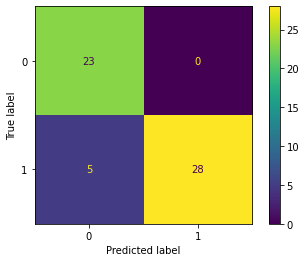

In [85]:
accuracy24=[]
precision=[]
recall=[]
f1score=[]
auc=[]

yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

par=best_params_list7[ac_list7.index(max(ac_list7))]
C=par['C']
degree=par['degree']

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sv_best = SVC(C=C, degree=degree )
    y_pred = fit_eval_model(sv_best, X_train, y_train, X_test, y_test)
    sv_best.fit(X_train, y_train)
    y_pred = sv_best.predict(X_test)
    
    accuracy24.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy24)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy24))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

In [86]:
best_params_list7[ac_list7.index(max(ac_list7))]

{'C': 3, 'degree': 5}

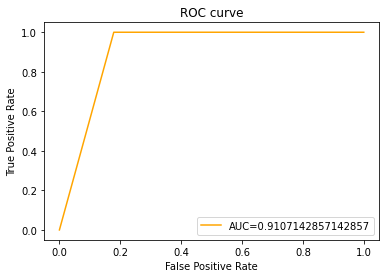

In [87]:
y_pred_proba = sv_best.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Saving best model

In [88]:
with open('breastcancer_model.pkl', 'wb') as file:
    pickle.dump(sv1, file)

print('model saved')

model saved
